In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set()

%matplotlib inline
sns.set()


plt.tight_layout()  # to fit the tixt overlap in the graph --

<Figure size 640x480 with 0 Axes>

In [2]:
pd.set_option('display.max_columns', 1000) # to see all columns data
pd.set_option('display.max_rows', 300) # to see all columns data
#pd.set_option('display.float_format', '{:.2%}'.format)
#pd.options.display.float_format = None
pd.set_option("display.max_colwidth", -1) # display the full text

/var/folders/q0/xtygmwwj1xd7jjkr58wmvp_80000gn/T/ipykernel_1474/3908210803.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1) # display the full text


## Read the Data and Exploring it (EDA) ------

In [3]:
df= pd.read_excel("buying_data.xlsx")

df_QVI_behaviour= pd.read_csv("buying_behaviour.csv")


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [5]:
df.head (10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-07-01,47,47142,42540,14,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.8
1,2018-07-01,55,55073,48884,99,Pringles Sthrn FriedChicken 134g,2,7.4
2,2018-07-01,55,55073,48884,91,CCs Tasty Cheese 175g,2,4.2
3,2018-07-01,58,58351,54374,102,Kettle Mozzarella Basil & Pesto 175g,2,10.8
4,2018-07-01,68,68193,65598,44,Thins Chips Light& Tangy 175g,2,6.6
5,2018-07-01,69,69207,67156,49,Infuzions SourCream&Herbs Veg Strws 110g,2,7.6
6,2018-07-01,78,78009,75510,35,Woolworths Mild Salsa 300g,2,3.0
7,2018-07-01,104,104017,103795,84,GrnWves Plus Btroot & Chilli Jam 180g,2,6.2
8,2018-07-01,113,113032,115576,6,RRD Lime & Pepper 165g,2,6.0
9,2018-07-01,119,119051,122360,113,Twisties Chicken270g,2,9.2


In [6]:
df.tail()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
264831,2019-06-30,242,242159,246222,36,Kettle Chilli 175g,2,10.8
264832,2019-06-30,244,244213,247339,93,Doritos Corn Chip Southern Chicken 150g,2,7.8
264833,2019-06-30,256,256018,255130,105,Woolworths Cheese Rings 190g,2,3.6
264834,2019-06-30,257,257079,256218,71,Twisties Cheese Burger 250g,2,8.6
264835,2019-06-30,265,265006,263307,106,Natural ChipCo Hony Soy Chckn175g,1,3.0


In [7]:
df.describe().round(2)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00,264836.00,264836.00,264836.00,264836.00,264836.00
mean,135.08,135549.48,135158.31,56.58,1.91,7.30
std,76.78,80579.98,78133.03,32.83,0.64,3.08
min,1.00,1000.00,1.00,1.00,1.00,1.50
25%,70.00,70021.00,67601.50,28.00,2.00,5.40
50%,130.00,130357.50,135137.50,56.00,2.00,7.40
75%,203.00,203094.25,202701.25,85.00,2.00,9.20
max,272.00,2373711.00,2415841.00,114.00,200.00,650.00


<AxesSubplot:>

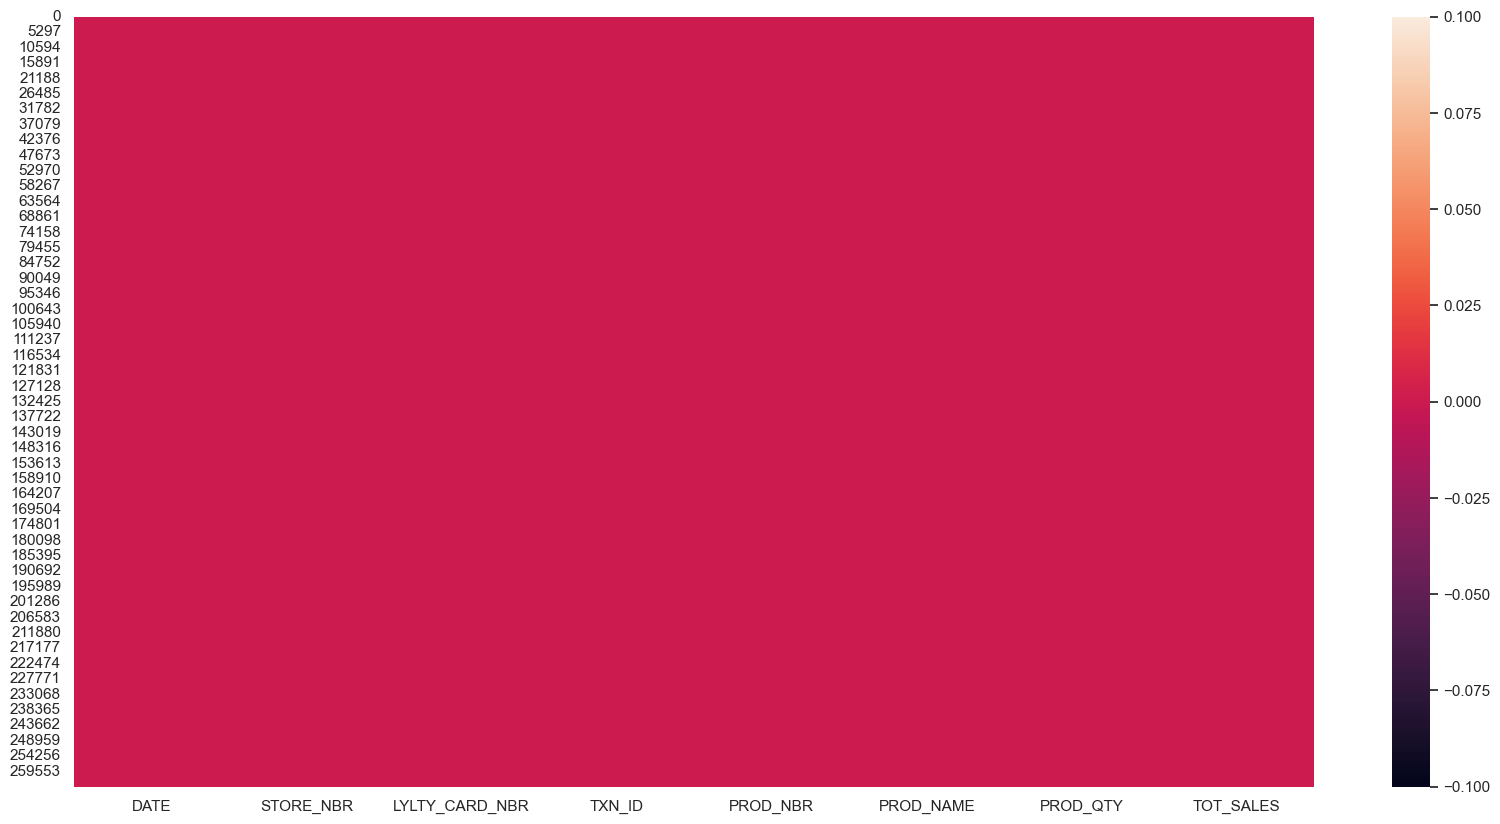

In [8]:
# check the nan Values with visualizing it

plt.figure(figsize=(20,10))
sns.heatmap(df.isna())

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

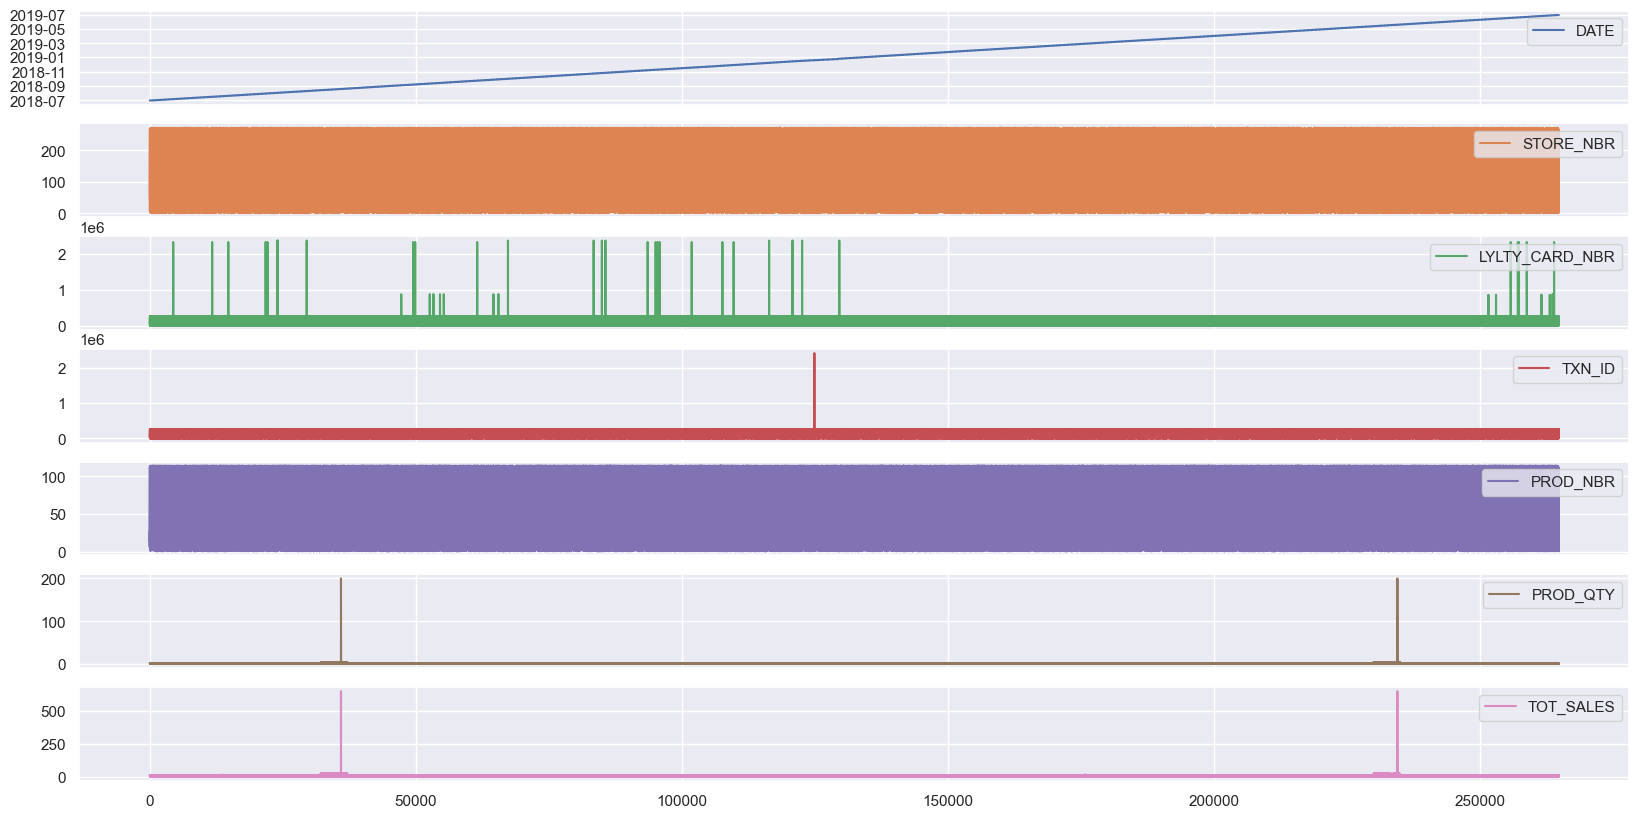

In [9]:
# check the outlier values for the numerical data by visualizing-----

df.plot(subplots= True, figsize=(20,10))

In [10]:
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-07-01,47,47142,42540,14,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.8
1,2018-07-01,55,55073,48884,99,Pringles Sthrn FriedChicken 134g,2,7.4
2,2018-07-01,55,55073,48884,91,CCs Tasty Cheese 175g,2,4.2
3,2018-07-01,58,58351,54374,102,Kettle Mozzarella Basil & Pesto 175g,2,10.8
4,2018-07-01,68,68193,65598,44,Thins Chips Light& Tangy 175g,2,6.6
...,...,...,...,...,...,...,...,...
264831,2019-06-30,242,242159,246222,36,Kettle Chilli 175g,2,10.8
264832,2019-06-30,244,244213,247339,93,Doritos Corn Chip Southern Chicken 150g,2,7.8
264833,2019-06-30,256,256018,255130,105,Woolworths Cheese Rings 190g,2,3.6
264834,2019-06-30,257,257079,256218,71,Twisties Cheese Burger 250g,2,8.6


In [11]:
# check random values ------
#df.sample(1).iloc[0]

df.sample(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
140614,2019-01-10,57,57185,52333,90,Tostitos Smoked Chipotle 175g,2,8.8
191161,2019-03-21,235,235119,238048,68,Pringles Chicken Salt Crips 134g,2,7.4
208479,2019-04-14,250,250005,251484,28,Thins Potato Chips Hot & Spicy 175g,2,6.6
245841,2019-06-05,109,109101,110810,32,Kettle Sea Salt And Vinegar 175g,2,10.8
59583,2018-09-21,213,213166,212983,54,CCs Original 175g,2,4.2
151675,2019-01-26,39,39085,35143,47,Doritos Corn Chips Original 170g,2,8.8
217610,2019-04-26,197,197427,197413,114,Kettle Sensations Siracha Lime 150g,2,9.2
62241,2018-09-24,154,154124,153972,77,Doritos Corn Chips Nacho Cheese 170g,1,4.4
14877,2018-07-21,130,130073,133959,7,Smiths Crinkle Original 330g,2,11.4
199560,2019-04-02,109,109150,111077,61,Smiths Crinkle Cut Chips Chicken 170g,2,5.8


In [12]:
# check the numbers of unique values in each column---------

df.nunique()

DATE              364   
STORE_NBR         272   
LYLTY_CARD_NBR    72637 
TXN_ID            263127
PROD_NBR          114   
PROD_NAME         114   
PROD_QTY          6     
TOT_SALES         112   
dtype: int64

In [13]:
# Check All unique products names ----------- 
df["PROD_NAME"].drop_duplicates()

0       Smiths Crnkle Chip  Orgnl Big Bag 380g  
1       Pringles Sthrn FriedChicken 134g        
2       CCs Tasty Cheese    175g                
3       Kettle Mozzarella   Basil & Pesto 175g  
4       Thins Chips Light&  Tangy 175g          
5       Infuzions SourCream&Herbs Veg Strws 110g
6       Woolworths Mild     Salsa 300g          
7       GrnWves Plus Btroot & Chilli Jam 180g   
8       RRD Lime & Pepper   165g                
9       Twisties Chicken270g                    
10      Red Rock Deli Thai  Chilli&Lime 150g    
11      Old El Paso Salsa   Dip Tomato Med 300g 
12      Smiths Crinkle Cut  French OnionDip 150g
13      Twisties Cheese     270g                
15      Smiths Crinkle      Original 330g       
16      Cheezels Cheese 330g                    
18      Pringles Slt Vingar 134g                
19      Smiths Crinkle Cut  Salt & Vinegar 170g 
21      Thins Potato Chips  Hot & Spicy 175g    
22      Tostitos Lightly    Salted 175g         
25      Kettle Sweet

In [14]:
# Check uniques values in the two columns or more ---------------

df[['PROD_QTY',"PROD_NAME"]].drop_duplicates().sample(15)

,PROD_QTY,PROD_NAME
32343,3,GrnWves Plus Btroot & Chilli Jam 180g
36971,4,Infzns Crn Crnchers Tangy Gcamole 110g
1193,1,WW Sour Cream &OnionStacked Chips 160g
483,1,Kettle Mozzarella Basil & Pesto 175g
464,1,Doritos Corn Chip Southern Chicken 150g
230326,5,Woolworths Cheese Rings 190g
985,1,Kettle Original 175g
34615,5,Dorito Corn Chp Supreme 380g
32220,3,Kettle Sensations BBQ&Maple 150g
231216,5,Infuzions Mango Chutny Papadums 70g


In [15]:
df.sample(15)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
229862,2019-05-13,81,81300,81072,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6
230588,2019-05-14,72,72184,71423,25,Pringles SourCream Onion 134g,1,3.7
37044,2018-08-20,50,50203,46348,22,Thins Chips Originl saltd 175g,1,3.3
1497,2018-07-03,223,223111,223578,74,Tostitos Splash Of Lime 175g,2,8.8
191857,2019-03-22,250,250319,252773,71,Twisties Cheese Burger 250g,2,8.6
116628,2018-12-09,94,94015,92531,73,Smiths Crinkle Cut Salt & Vinegar 170g,2,5.8
208435,2019-04-14,80,80147,78853,47,Doritos Corn Chips Original 170g,2,8.8
187118,2019-03-15,150,150368,149718,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6
109483,2018-11-29,71,71029,69082,102,Kettle Mozzarella Basil & Pesto 175g,2,10.8
129137,2018-12-24,153,153316,153227,99,Pringles Sthrn FriedChicken 134g,2,7.4


## Some notes:

1- The PROD_NAME column has some problems such as different spaces between words. 

2- Some times in the same column g or G 

3- Data from 2018-07-01 to 2019-06-30

### 1- Replace the multiples whitespace to one with space 

In [16]:
# Replace the multiples whitespace to one with space --------


df["PROD_NAME"]=df["PROD_NAME"].str.replace(r"\ +", " ")


/var/folders/q0/xtygmwwj1xd7jjkr58wmvp_80000gn/T/ipykernel_1474/2918285392.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df["PROD_NAME"]=df["PROD_NAME"].str.replace(r"\ +", " ")


In [17]:
df["PROD_NAME"].drop_duplicates()

0       Smiths Crnkle Chip Orgnl Big Bag 380g   
1       Pringles Sthrn FriedChicken 134g        
2       CCs Tasty Cheese 175g                   
3       Kettle Mozzarella Basil & Pesto 175g    
4       Thins Chips Light& Tangy 175g           
5       Infuzions SourCream&Herbs Veg Strws 110g
6       Woolworths Mild Salsa 300g              
7       GrnWves Plus Btroot & Chilli Jam 180g   
8       RRD Lime & Pepper 165g                  
9       Twisties Chicken270g                    
10      Red Rock Deli Thai Chilli&Lime 150g     
11      Old El Paso Salsa Dip Tomato Med 300g   
12      Smiths Crinkle Cut French OnionDip 150g 
13      Twisties Cheese 270g                    
15      Smiths Crinkle Original 330g            
16      Cheezels Cheese 330g                    
18      Pringles Slt Vingar 134g                
19      Smiths Crinkle Cut Salt & Vinegar 170g  
21      Thins Potato Chips Hot & Spicy 175g     
22      Tostitos Lightly Salted 175g            
25      Kettle Sweet

In [18]:
# Create new separate column called "Weight" ---

df["Weight"]= df["PROD_NAME"].str.split(" ").str.get(-1)

In [19]:
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight
0,2018-07-01,47,47142,42540,14,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.8,380g
1,2018-07-01,55,55073,48884,99,Pringles Sthrn FriedChicken 134g,2,7.4,134g
2,2018-07-01,55,55073,48884,91,CCs Tasty Cheese 175g,2,4.2,175g
3,2018-07-01,58,58351,54374,102,Kettle Mozzarella Basil & Pesto 175g,2,10.8,175g
4,2018-07-01,68,68193,65598,44,Thins Chips Light& Tangy 175g,2,6.6,175g
...,...,...,...,...,...,...,...,...,...
264831,2019-06-30,242,242159,246222,36,Kettle Chilli 175g,2,10.8,175g
264832,2019-06-30,244,244213,247339,93,Doritos Corn Chip Southern Chicken 150g,2,7.8,150g
264833,2019-06-30,256,256018,255130,105,Woolworths Cheese Rings 190g,2,3.6,190g
264834,2019-06-30,257,257079,256218,71,Twisties Cheese Burger 250g,2,8.6,250g


In [20]:
# Check the product name to find where and why the weight empty values with which product -------
# I found that  " Kettle 135g Swt Pot Sea Salt"
# I found 30 unique values in Weight cloumn ????? why ----- 

df["Weight"].nunique()  # --- 30 unique values 

df["Weight"].drop_duplicates()

0       380g              
1       134g              
2       175g              
5       110g              
6       300g              
7       180g              
8       165g              
9       Chicken270g       
10      150g              
13      270g              
15      330g              
19      170g              
31      160g              
37      Chs&Onion170g     
39      210G              
58      125g              
63      220g              
64      Ht300g            
70      Salt              
76      200g              
78      210g              
111     Chli&S/Cream175G  
190     250g              
198     150G              
211     90g               
221     CutSalt/Vinegr175g
480     190g              
621     70g               
839     SeaSalt175g       
1226    Chckn175g         
Name: Weight, dtype: object

In [21]:
# For solve the problem, I should add the regex between pair of parenthesis like that (r"(\d+[g|G])") not like that (r"[\d+[g|G]") 

# Separate text from weight column in new column called Net_Weight ----

df["Net_Weight"]= df["Weight"].str.extract(r"(\d+[g|G])")


In [22]:
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight,Net_Weight
0,2018-07-01,47,47142,42540,14,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.8,380g,380g
1,2018-07-01,55,55073,48884,99,Pringles Sthrn FriedChicken 134g,2,7.4,134g,134g
2,2018-07-01,55,55073,48884,91,CCs Tasty Cheese 175g,2,4.2,175g,175g
3,2018-07-01,58,58351,54374,102,Kettle Mozzarella Basil & Pesto 175g,2,10.8,175g,175g
4,2018-07-01,68,68193,65598,44,Thins Chips Light& Tangy 175g,2,6.6,175g,175g
...,...,...,...,...,...,...,...,...,...,...
264831,2019-06-30,242,242159,246222,36,Kettle Chilli 175g,2,10.8,175g,175g
264832,2019-06-30,244,244213,247339,93,Doritos Corn Chip Southern Chicken 150g,2,7.8,150g,150g
264833,2019-06-30,256,256018,255130,105,Woolworths Cheese Rings 190g,2,3.6,190g,190g
264834,2019-06-30,257,257079,256218,71,Twisties Cheese Burger 250g,2,8.6,250g,250g


In [23]:
df["Net_Weight"].sample(200)

114066    175g
7463      165g
13832     330g
165514    380g
243467    150g
76361     175g
257350    175g
217473    175g
202094    175g
251880    220g
185871    134g
79594     170g
8880      270g
28441     150g
244190    150g
249749    150g
248008    380g
67176     300g
163290    380g
39199     134g
237477    300g
243417    380g
36577     150g
241069    300g
80970     170g
108346    110g
42190     134g
65911     150g
224628    170g
259555    270g
47657     150g
199905    210g
29967     175g
247399    110g
130711    165g
37411     150g
40257     150g
188274    210G
212152    150g
78553     165g
163059    110g
195231    170g
220562    330g
240605    150g
18941     330g
184761    380g
146627    150g
210748    175g
34704     200g
220267    175g
53034     175g
167776    150g
89100     110g
201750    175g
193824    175g
196595    110g
221831    175g
172926    180g
50254     175g
213634    134g
21396     150G
217756    150g
194936    175g
199233    134g
239303    330g
259980    175g
152888    

In [24]:
# Check the product name to find where and why the Net_Weight empty values with which product -------
# I found that  " Kettle 135g Swt Pot Sea Salt"
# I found 30 unique values in Weight cloumn ????? why ----- 

df["Net_Weight"].nunique()

23

In [25]:
df["Net_Weight"].drop_duplicates()

0      380g
1      134g
2      175g
5      110g
6      300g
7      180g
8      165g
9      270g
10     150g
15     330g
19     170g
31     160g
39     210G
58     125g
63     220g
70     NaN 
76     200g
78     210g
111    175G
190    250g
198    150G
211    90g 
480    190g
621    70g 
Name: Net_Weight, dtype: object

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
 8   Weight          264836 non-null  object        
 9   Net_Weight      261579 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 20.2+ MB


<AxesSubplot:>

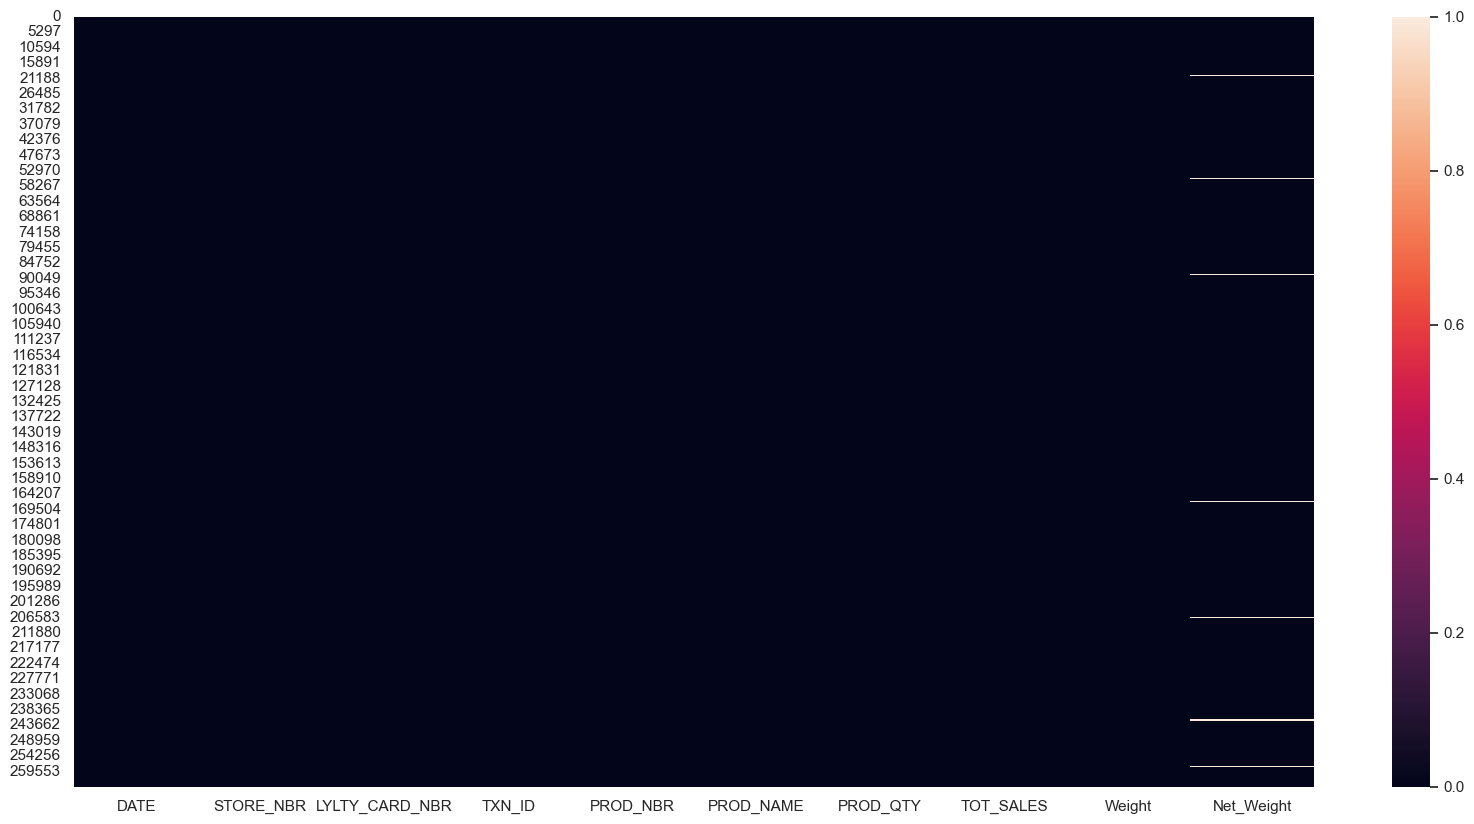

In [27]:
# check the nan Values with visualizing it

plt.figure(figsize=(20,10))
sns.heatmap(df.isna())

In [28]:
# Check NaN Values in Net_Weight column ---- 
# The nan values because when I seprate the weight from product name column the weight of Kettle 135g Swt Pot Sea Salt is in between so the value will be "Salt", so when I try to seprate the text in second step to Net_weight column vlau converted to Nan to I will replace Nan Valure to 135g 

df.iloc[49107]

DATE              2018-09-06 00:00:00         
STORE_NBR         233                         
LYLTY_CARD_NBR    233362                      
TXN_ID            237139                      
PROD_NBR          63                          
PROD_NAME         Kettle 135g Swt Pot Sea Salt
PROD_QTY          2                           
TOT_SALES         8.4                         
Weight            Salt                        
Net_Weight        NaN                         
Name: 49107, dtype: object

In [29]:
df.fillna({"Net_Weight":"135g"}, inplace=True)

In [30]:
df.iloc[49107]

DATE              2018-09-06 00:00:00         
STORE_NBR         233                         
LYLTY_CARD_NBR    233362                      
TXN_ID            237139                      
PROD_NBR          63                          
PROD_NAME         Kettle 135g Swt Pot Sea Salt
PROD_QTY          2                           
TOT_SALES         8.4                         
Weight            Salt                        
Net_Weight        135g                        
Name: 49107, dtype: object

In [31]:
df["Net_Weight"].drop_duplicates()

0      380g
1      134g
2      175g
5      110g
6      300g
7      180g
8      165g
9      270g
10     150g
15     330g
19     170g
31     160g
39     210G
58     125g
63     220g
70     135g
76     200g
78     210g
111    175G
190    250g
198    150G
211    90g 
480    190g
621    70g 
Name: Net_Weight, dtype: object

In [32]:
df["PROD_NAME"].drop_duplicates()

0       Smiths Crnkle Chip Orgnl Big Bag 380g   
1       Pringles Sthrn FriedChicken 134g        
2       CCs Tasty Cheese 175g                   
3       Kettle Mozzarella Basil & Pesto 175g    
4       Thins Chips Light& Tangy 175g           
5       Infuzions SourCream&Herbs Veg Strws 110g
6       Woolworths Mild Salsa 300g              
7       GrnWves Plus Btroot & Chilli Jam 180g   
8       RRD Lime & Pepper 165g                  
9       Twisties Chicken270g                    
10      Red Rock Deli Thai Chilli&Lime 150g     
11      Old El Paso Salsa Dip Tomato Med 300g   
12      Smiths Crinkle Cut French OnionDip 150g 
13      Twisties Cheese 270g                    
15      Smiths Crinkle Original 330g            
16      Cheezels Cheese 330g                    
18      Pringles Slt Vingar 134g                
19      Smiths Crinkle Cut Salt & Vinegar 170g  
21      Thins Potato Chips Hot & Spicy 175g     
22      Tostitos Lightly Salted 175g            
25      Kettle Sweet

In [33]:
df.drop("Weight", axis=1, inplace=True)

In [34]:
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Net_Weight
0,2018-07-01,47,47142,42540,14,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.8,380g
1,2018-07-01,55,55073,48884,99,Pringles Sthrn FriedChicken 134g,2,7.4,134g
2,2018-07-01,55,55073,48884,91,CCs Tasty Cheese 175g,2,4.2,175g
3,2018-07-01,58,58351,54374,102,Kettle Mozzarella Basil & Pesto 175g,2,10.8,175g
4,2018-07-01,68,68193,65598,44,Thins Chips Light& Tangy 175g,2,6.6,175g
...,...,...,...,...,...,...,...,...,...
264831,2019-06-30,242,242159,246222,36,Kettle Chilli 175g,2,10.8,175g
264832,2019-06-30,244,244213,247339,93,Doritos Corn Chip Southern Chicken 150g,2,7.8,150g
264833,2019-06-30,256,256018,255130,105,Woolworths Cheese Rings 190g,2,3.6,190g
264834,2019-06-30,257,257079,256218,71,Twisties Cheese Burger 250g,2,8.6,250g


<AxesSubplot:>

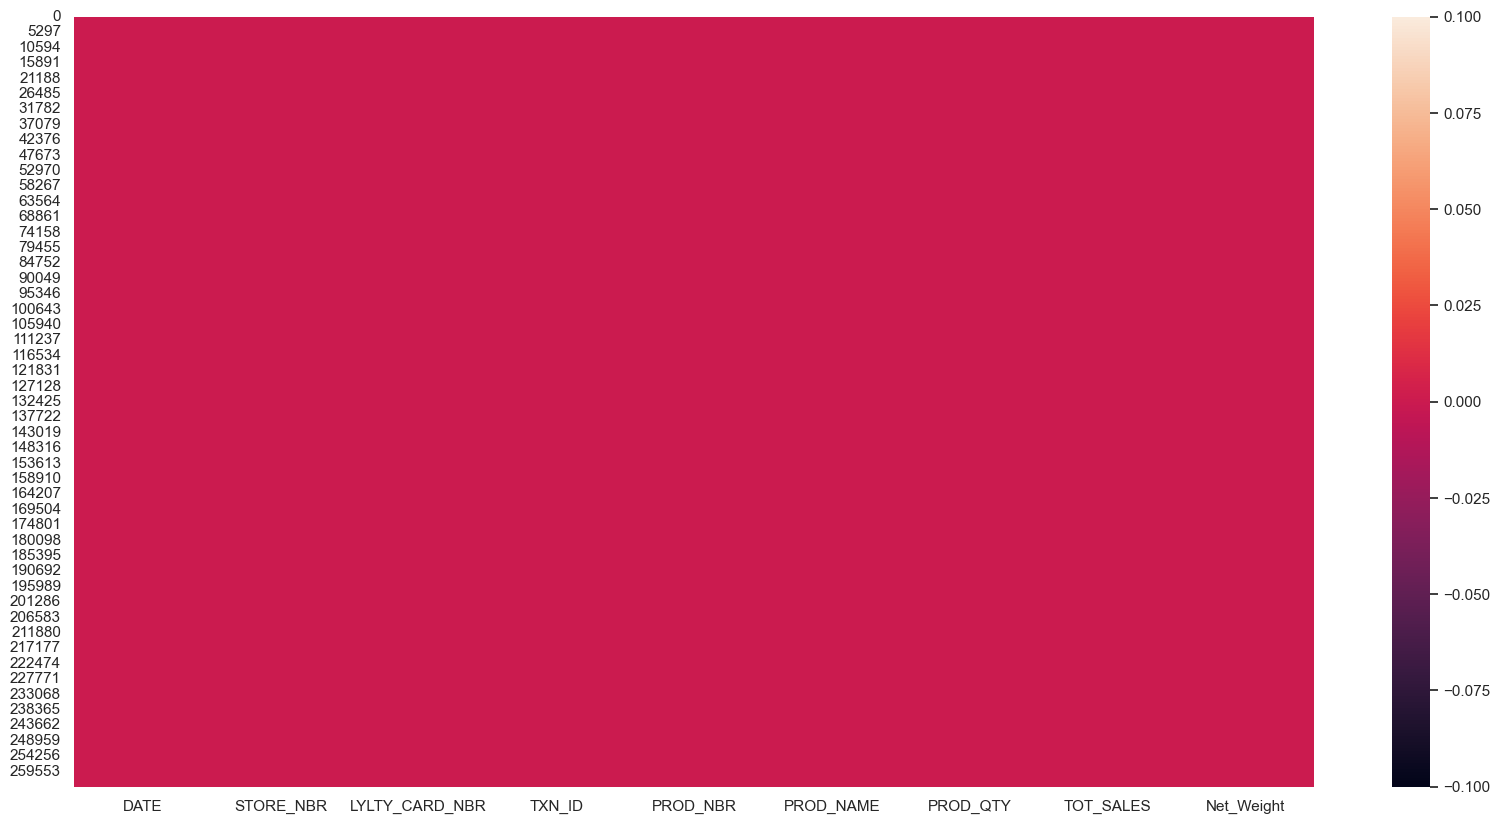

In [35]:
# check the nan Values with visualizing it

plt.figure(figsize=(20,10))
sns.heatmap(df.isna())

In [36]:
# Replace the G letter to g --------
# Note: inplace= True not working her , I used regex=True -------

#df["Net_Weight"]=df["Net_Weight"].str.replace('G', 'g', inplace=True)

df["Net_Weight"]=df["Net_Weight"].str.replace('G', 'g', regex=True)


In [37]:
df["Net_Weight"].value_counts()

175g    66390
150g    43131
134g    25102
110g    22387
170g    19983
165g    15297
300g    15166
330g    12540
380g    6418 
270g    6285 
210g    6272 
200g    4473 
135g    3257 
250g    3169 
90g     3008 
190g    2995 
160g    2970 
220g    1564 
70g     1507 
180g    1468 
125g    1454 
Name: Net_Weight, dtype: int64

In [38]:
df.sample(50)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Net_Weight
4977,2018-07-07,55,55155,49408,11,RRD Pc Sea Salt 165g,2,6.0,165g
113770,2018-12-05,73,73328,72665,98,NCC Sour Cream & Garden Chives 175g,2,6.0,175g
253336,2019-06-15,238,238106,242308,51,Doritos Mexicana 170g,1,4.4,170g
247548,2019-06-07,181,181300,183803,81,Pringles Original Crisps 134g,2,7.4,134g
76294,2018-10-14,88,88168,87061,47,Doritos Corn Chips Original 170g,2,8.8,170g
164865,2019-02-13,56,56062,50349,53,RRD Sweet Chilli & Sour Cream 165g,2,6.0,165g
240109,2019-05-28,57,57220,52554,26,Pringles Sweet&Spcy BBQ 134g,2,7.4,134g
253531,2019-06-15,250,250192,252272,102,Kettle Mozzarella Basil & Pesto 175g,2,10.8,175g
232719,2019-05-17,30,30067,26896,1,Smiths Crinkle Cut Chips Barbecue 170g,2,5.8,170g
126096,2018-12-21,75,75184,74158,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6,110g


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

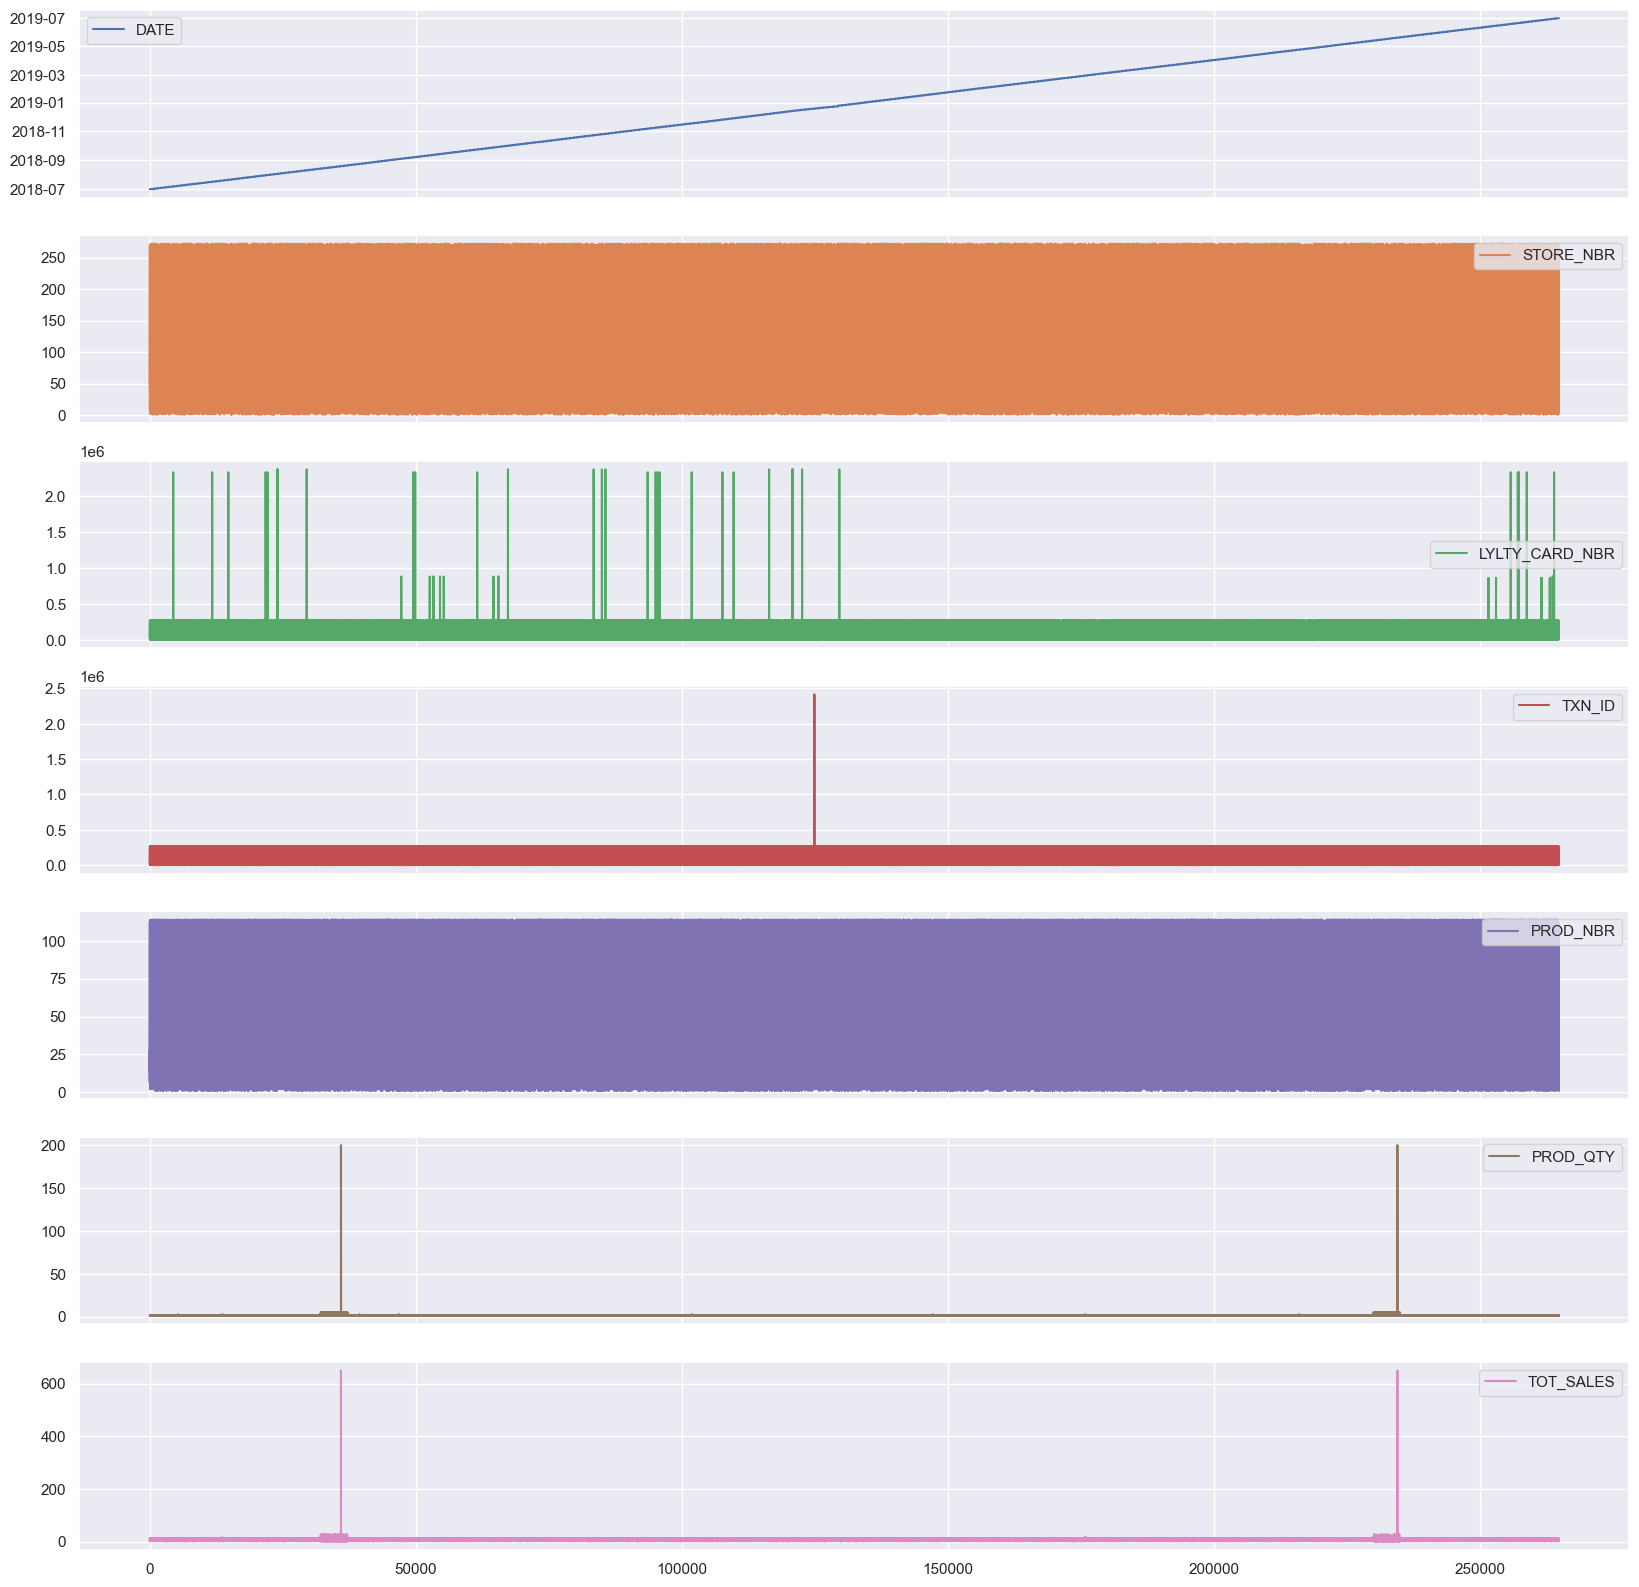

In [39]:
# check the outlier values for the numerical data by using visualizing-----

df.plot(subplots= True, figsize=(20,20))

<AxesSubplot:>

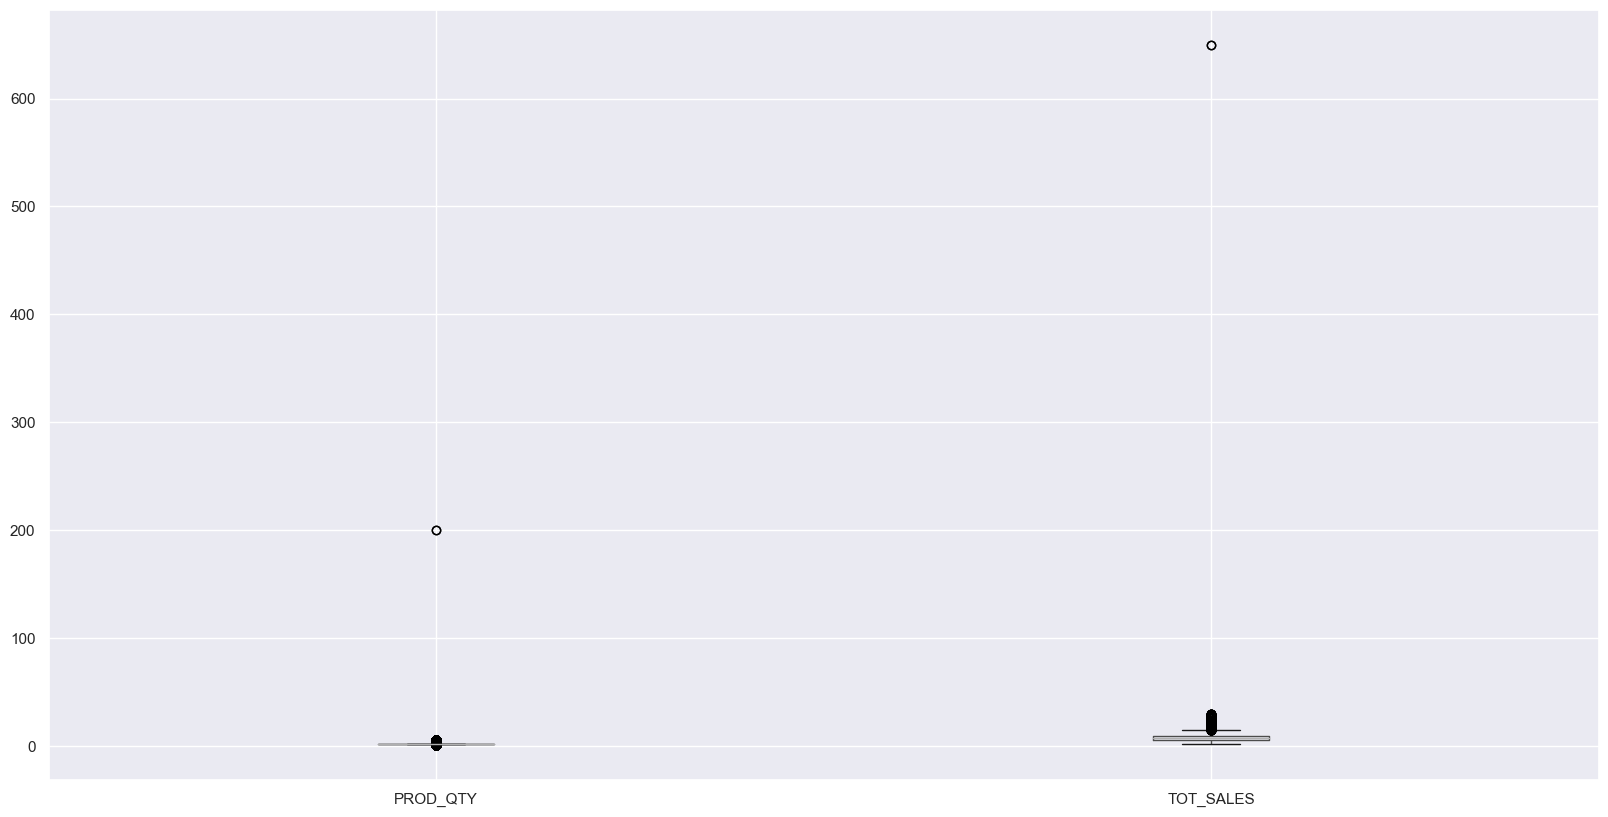

In [40]:
#df.boxplot(column=['PROD_QTY', 'TOT_SALES']) 

df.boxplot(['PROD_QTY', 'TOT_SALES'], figsize=(20,10)) 

In [41]:
df[['PROD_QTY', 'TOT_SALES']].nunique()  # --- 30 unique values 


PROD_QTY     6  
TOT_SALES    112
dtype: int64

In [42]:
df['TOT_SALES'].duplicated().value_counts()

True     264724
False    112   
Name: TOT_SALES, dtype: int64

In [43]:
df['PROD_QTY'].drop_duplicates()

0        2  
10       1  
5274     3  
32124    4  
32158    5  
35936    200
Name: PROD_QTY, dtype: int64

In [44]:
df[df['TOT_SALES'] == 650]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Net_Weight
35936,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,380g
234487,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,380g


After discover the two outlier values in two columns "PROD_QTY" = 200 and 'TOT_SALES' = 650, and check the averge of sales by the ["PROD_NAME"] == "Dorito Corn Chp Supreme 380g"

I found that the "PROD_QTY" between 1 or 2 and the TOT_SALES' between 6.5 and 13

So, I will change the two outliers values in two columns 2 instead 200 and 6.5 instead 650

In [45]:
# replace vlaues in columns "PROD_QTY" = 200  and 'TOT_SALES' = 650 ----

df["PROD_QTY"]=df["PROD_QTY"].replace(200, 2)
df["TOT_SALES"]=df["TOT_SALES"].replace(650, 6.50)

<AxesSubplot:>

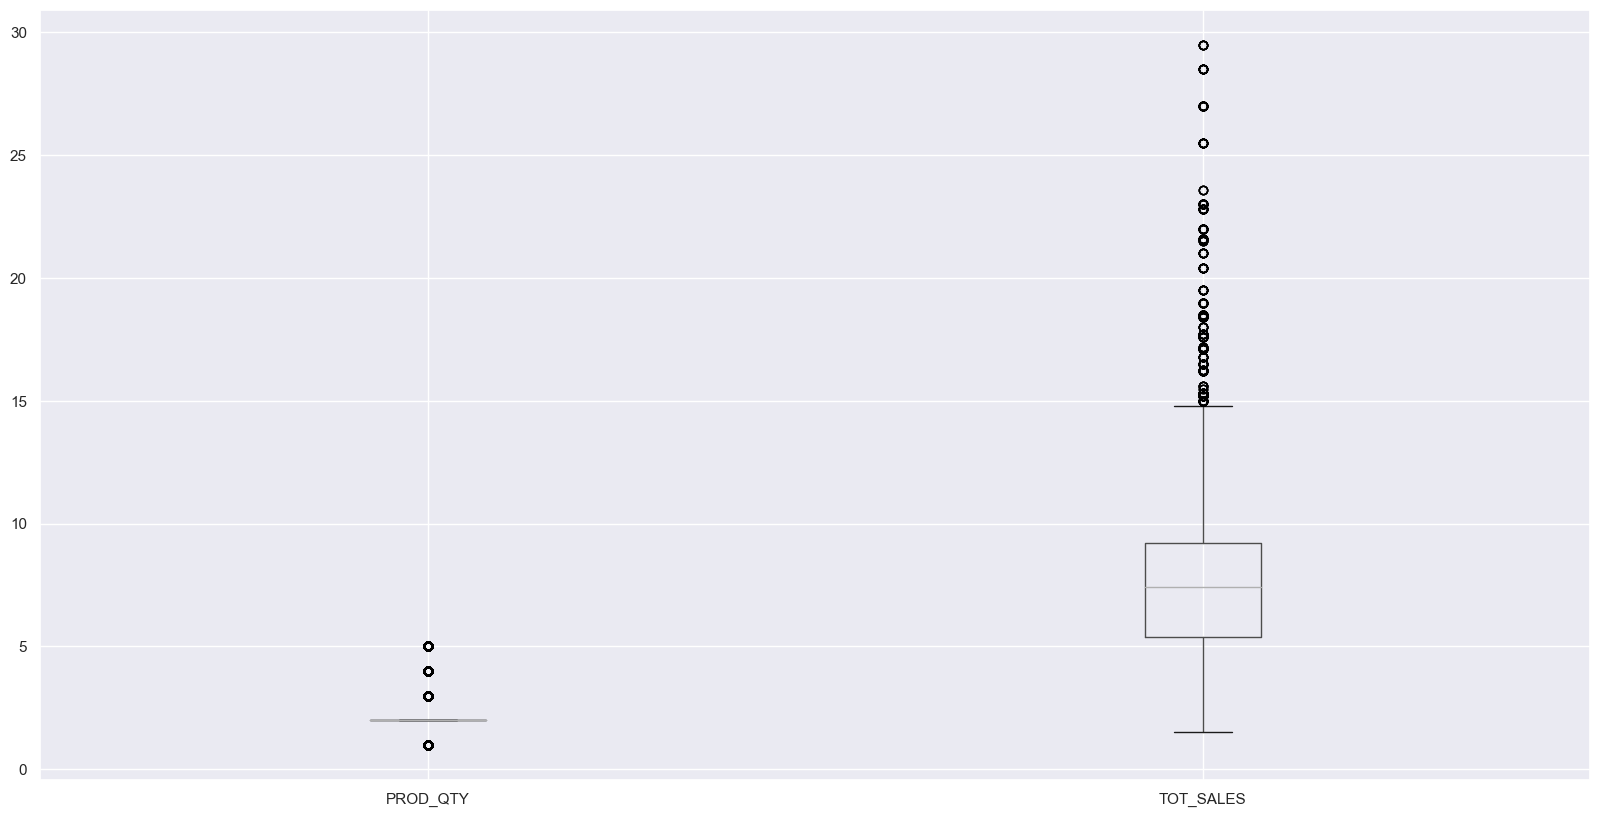

In [46]:
#Double check the outliers after replace "PROD_QTY" = 200  and 'TOT_SALES' = 650 

df.boxplot(['PROD_QTY', 'TOT_SALES'], figsize=(20,10)) 

In [47]:
df[['PROD_QTY','TOT_SALES']].describe().round (2)

,PROD_QTY,TOT_SALES
count,264836.00,264836.00
mean,1.91,7.30
std,0.34,2.53
min,1.00,1.50
25%,2.00,5.40
50%,2.00,7.40
75%,2.00,9.20
max,5.00,29.50


In [48]:
df[df['TOT_SALES'] == 29.5]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Net_Weight
32805,2018-08-15,94,94148,93390,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,380g
32975,2018-08-15,49,49303,45789,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,380g
34767,2018-08-17,24,24095,20797,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,380g
230119,2019-05-14,190,190113,190914,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,380g
233867,2019-05-19,194,194308,194516,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,380g
234731,2019-05-20,118,118021,120799,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,380g
234801,2019-05-20,44,44350,40394,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,380g


In [49]:
df[df['PROD_QTY'] == 5]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Net_Weight
32158,2018-08-14,138,138222,141917,54,CCs Original 175g,5,10.5,175g
32159,2018-08-14,149,149267,148970,102,Kettle Mozzarella Basil & Pesto 175g,5,27.0,175g
32163,2018-08-14,157,157183,159545,92,WW Crinkle Cut Chicken 175g,5,8.5,175g
32208,2018-08-14,94,94255,94107,2,Cobs Popd Sour Crm &Chives Chips 110g,5,19.0,110g
32221,2018-08-14,155,155087,155558,101,Doritos Salsa Medium 300g,5,13.0,300g
...,...,...,...,...,...,...,...,...,...
234818,2019-05-20,162,162200,163005,64,Red Rock Deli SR Salsa & Mzzrlla 150g,5,13.5,150g
234826,2019-05-20,207,207126,205349,28,Thins Potato Chips Hot & Spicy 175g,5,16.5,175g
234846,2019-05-20,24,24105,20857,6,RRD Lime & Pepper 165g,5,15.0,165g
234871,2019-05-20,3,3025,1207,99,Pringles Sthrn FriedChicken 134g,5,7.4,134g


In [50]:
Q1=df.quantile(.25).round(2)
Q1

STORE_NBR         70.0   
LYLTY_CARD_NBR    70021.0
TXN_ID            67601.5
PROD_NBR          28.0   
PROD_QTY          2.0    
TOT_SALES         5.4    
Name: 0.25, dtype: float64

In [51]:
Q3=df.quantile(.75).round(2)
Q3

STORE_NBR         203.00   
LYLTY_CARD_NBR    203094.25
TXN_ID            202701.25
PROD_NBR          85.00    
PROD_QTY          2.00     
TOT_SALES         9.20     
Name: 0.75, dtype: float64

In [52]:
IQR= Q3-Q1

In [53]:
Lower_limit= Q1-(1.5*IQR)
Higher_limit= Q3+(1.5* IQR)

In [54]:
Lower_limit

STORE_NBR        -129.500   
LYLTY_CARD_NBR   -129588.875
TXN_ID           -135048.125
PROD_NBR         -57.500    
PROD_QTY          2.000     
TOT_SALES        -0.300     
dtype: float64

In [55]:
Higher_limit

STORE_NBR         402.500   
LYLTY_CARD_NBR    402704.125
TXN_ID            405350.875
PROD_NBR          170.500   
PROD_QTY          2.000     
TOT_SALES         14.900    
dtype: float64

In [56]:
df[df['TOT_SALES'] > 14.900]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Net_Weight
13639,2018-07-19,105,105127,106050,23,Cheezels Cheese 330g,3,17.1,330g
32109,2018-08-14,217,217294,217612,89,Kettle Sweet Chilli And Sour Cream 175g,3,16.2,175g
32124,2018-08-14,27,27179,24216,20,Doritos Cheese Supreme 330g,4,22.8,330g
32136,2018-08-14,72,72201,71483,65,Old El Paso Salsa Dip Chnky Tom Ht300g,3,15.3,300g
32159,2018-08-14,149,149267,148970,102,Kettle Mozzarella Basil & Pesto 175g,5,27.0,175g
...,...,...,...,...,...,...,...,...,...
234852,2019-05-20,104,104223,105099,16,Smiths Crinkle Chips Salt & Vinegar 330g,4,22.8,330g
234865,2019-05-20,213,213148,212870,2,Cobs Popd Sour Crm &Chives Chips 110g,4,15.2,110g
234934,2019-05-20,269,269173,266088,57,Old El Paso Salsa Dip Tomato Mild 300g,3,15.3,300g
234955,2019-05-20,82,82223,81709,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,4,18.4,150g


In [57]:
df[(df['TOT_SALES'] <=14.900) & (df['TOT_SALES'] > -0.300 )]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Net_Weight
0,2018-07-01,47,47142,42540,14,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.8,380g
1,2018-07-01,55,55073,48884,99,Pringles Sthrn FriedChicken 134g,2,7.4,134g
2,2018-07-01,55,55073,48884,91,CCs Tasty Cheese 175g,2,4.2,175g
3,2018-07-01,58,58351,54374,102,Kettle Mozzarella Basil & Pesto 175g,2,10.8,175g
4,2018-07-01,68,68193,65598,44,Thins Chips Light& Tangy 175g,2,6.6,175g
...,...,...,...,...,...,...,...,...,...
264831,2019-06-30,242,242159,246222,36,Kettle Chilli 175g,2,10.8,175g
264832,2019-06-30,244,244213,247339,93,Doritos Corn Chip Southern Chicken 150g,2,7.8,150g
264833,2019-06-30,256,256018,255130,105,Woolworths Cheese Rings 190g,2,3.6,190g
264834,2019-06-30,257,257079,256218,71,Twisties Cheese Burger 250g,2,8.6,250g


## Descover the buying_behaviour data


In [58]:
df_QVI_behaviour

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [59]:
df_QVI_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [60]:
# check the Nan Values numbers -----
df_QVI_behaviour.count()

LYLTY_CARD_NBR      72637
LIFESTAGE           72637
PREMIUM_CUSTOMER    72637
dtype: int64

In [61]:
# Check All unique PREMIUM_CUSTOMER  ----------- 

df_QVI_behaviour["PREMIUM_CUSTOMER"].drop_duplicates()

0    Premium   
1    Mainstream
2    Budget    
Name: PREMIUM_CUSTOMER, dtype: object

In [62]:
# Check All unique LIFESTAGE ----------- 

df_QVI_behaviour["LIFESTAGE"].drop_duplicates()

0     YOUNG SINGLES/COUPLES 
2     YOUNG FAMILIES        
3     OLDER SINGLES/COUPLES 
4     MIDAGE SINGLES/COUPLES
6     NEW FAMILIES          
9     OLDER FAMILIES        
10    RETIREES              
Name: LIFESTAGE, dtype: object

## Merge two data frame -----

In [63]:
# Merge two data frame and drop 'TXN_ID','PROD_NBR' I don't use it  ----------- 

merge_data= df.drop(['TXN_ID','PROD_NBR'], axis=1).merge(df_QVI_behaviour)

In [64]:
merge_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Net_Weight,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-01,47,47142,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.8,380g,MIDAGE SINGLES/COUPLES,Budget
1,2018-07-01,55,55073,Pringles Sthrn FriedChicken 134g,2,7.4,134g,MIDAGE SINGLES/COUPLES,Budget
2,2018-07-01,55,55073,CCs Tasty Cheese 175g,2,4.2,175g,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-05,55,55073,Pringles Barbeque 134g,2,7.4,134g,MIDAGE SINGLES/COUPLES,Budget
4,2018-09-02,55,55073,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175g,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...
264831,2019-06-30,265,265221,Doritos Cheese Supreme 330g,1,5.7,330g,YOUNG SINGLES/COUPLES,Mainstream
264832,2019-06-30,6,6358,Infuzions BBQ Rib Prawn Crackers 110g,1,3.8,110g,YOUNG SINGLES/COUPLES,Premium
264833,2019-06-30,169,169080,Smiths Crinkle Cut Chips Barbecue 170g,2,5.8,170g,YOUNG SINGLES/COUPLES,Premium
264834,2019-06-30,244,244213,Doritos Corn Chip Southern Chicken 150g,2,7.8,150g,YOUNG SINGLES/COUPLES,Premium


In [65]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264836 non-null  datetime64[ns]
 1   STORE_NBR         264836 non-null  int64         
 2   LYLTY_CARD_NBR    264836 non-null  int64         
 3   PROD_NAME         264836 non-null  object        
 4   PROD_QTY          264836 non-null  int64         
 5   TOT_SALES         264836 non-null  float64       
 6   Net_Weight        264836 non-null  object        
 7   LIFESTAGE         264836 non-null  object        
 8   PREMIUM_CUSTOMER  264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 20.2+ MB


In [66]:
merge_data.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
Net_Weight          0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

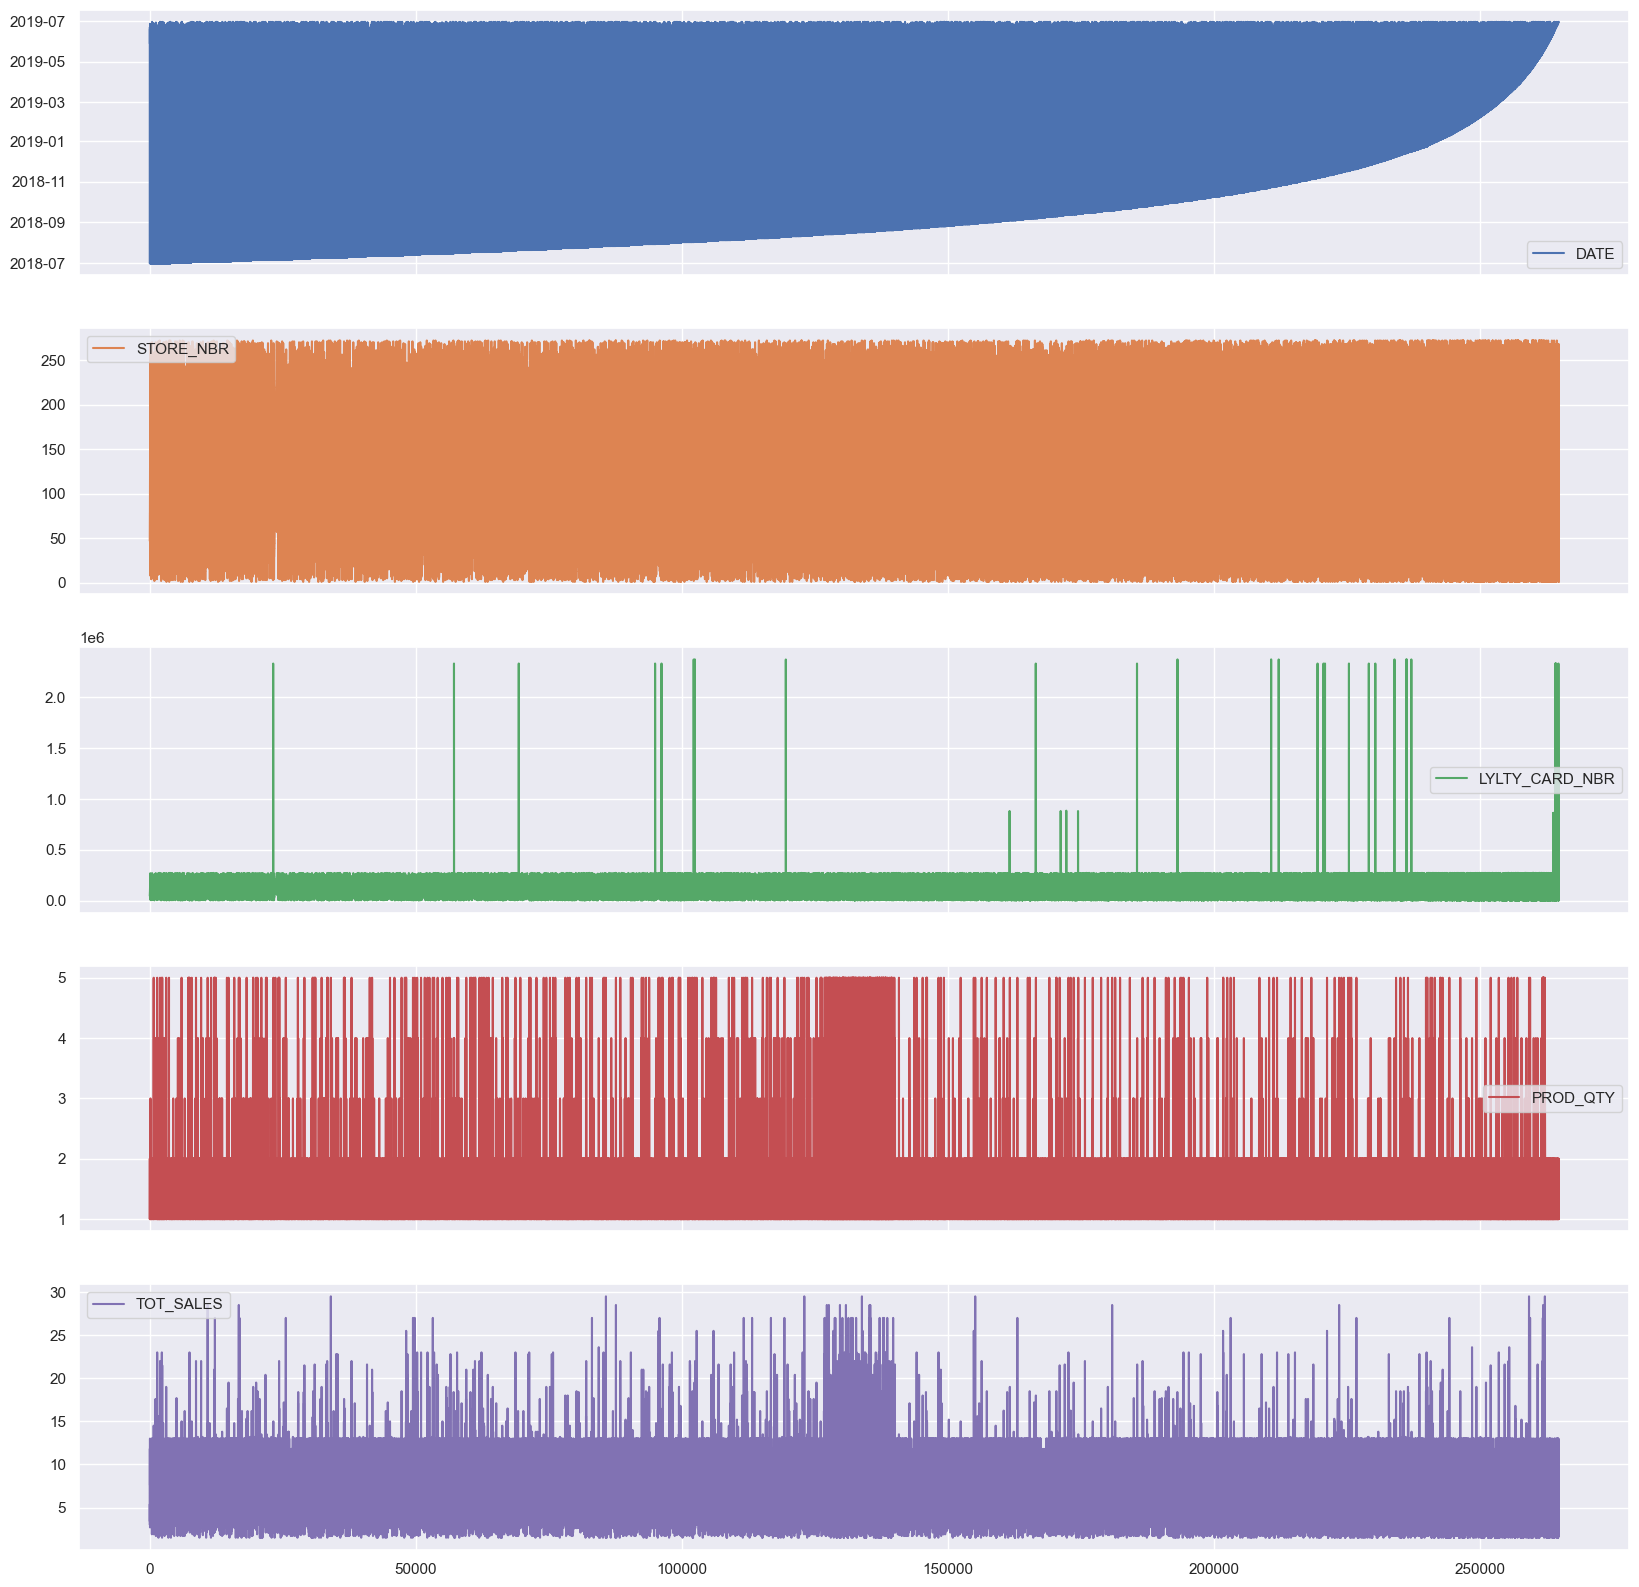

In [67]:
# check the outlier values for the numerical data by using visualizing-----

merge_data.plot(subplots= True, figsize=(20,20))

In [68]:
# Change the index by the date ---------- 

# Note: I get error --"None of ['DATE'] are in the columns" -- but the code is run correctly 

# the code ---
merge_data.set_index("DATE", inplace=True)

In [69]:
merge_data

,STORE_NBR,LYLTY_CARD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Net_Weight,LIFESTAGE,PREMIUM_CUSTOMER
DATE,,,,,,,,
2018-07-01,47,47142,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.8,380g,MIDAGE SINGLES/COUPLES,Budget
2018-07-01,55,55073,Pringles Sthrn FriedChicken 134g,2,7.4,134g,MIDAGE SINGLES/COUPLES,Budget
2018-07-01,55,55073,CCs Tasty Cheese 175g,2,4.2,175g,MIDAGE SINGLES/COUPLES,Budget
2018-08-05,55,55073,Pringles Barbeque 134g,2,7.4,134g,MIDAGE SINGLES/COUPLES,Budget
2018-09-02,55,55073,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175g,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...
2019-06-30,265,265221,Doritos Cheese Supreme 330g,1,5.7,330g,YOUNG SINGLES/COUPLES,Mainstream
2019-06-30,6,6358,Infuzions BBQ Rib Prawn Crackers 110g,1,3.8,110g,YOUNG SINGLES/COUPLES,Premium
2019-06-30,169,169080,Smiths Crinkle Cut Chips Barbecue 170g,2,5.8,170g,YOUNG SINGLES/COUPLES,Premium


<AxesSubplot:>

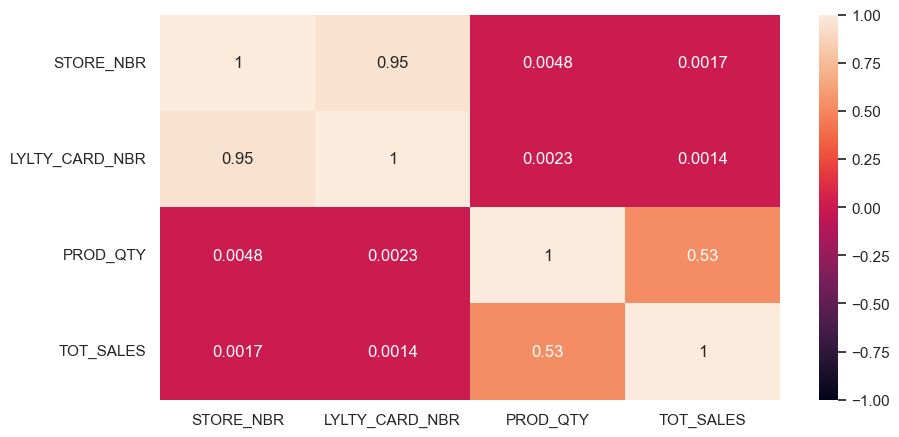

In [70]:
# check the correlation between variables by heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(merge_data.corr(), vmin=-1, vmax=1, annot=True)


In [71]:
merge_data.corr()

,STORE_NBR,LYLTY_CARD_NBR,PROD_QTY,TOT_SALES
STORE_NBR,1.000000,0.950869,0.004768,0.001669
LYLTY_CARD_NBR,0.950869,1.000000,0.002298,0.001390
PROD_QTY,0.004768,0.002298,1.000000,0.527787
TOT_SALES,0.001669,0.001390,0.527787,1.000000


Based on the correlation, there is a strong correlation between STORE_NBR ( Store ) and the number of customers (LYLTY_CARD_NBR)
Also, the correlation between the sales (TOT_SALES) and customer numbers (LYLTY_CARD_NBR) is shallow, it means that the numbers of customers doesn't indicate the store gains high sales based on the number of their customers.

In [72]:
# total sales revenue----

merge_data['TOT_SALES'].sum().round(2)

1933128.0

In [73]:
# total number of customers is 72637 ----

merge_data["LYLTY_CARD_NBR"].nunique()  

72637

In [74]:
merge_data["LYLTY_CARD_NBR"].drop_duplicates()

DATE
2018-07-01    47142 
2018-07-01    55073 
2018-07-01    58351 
2018-07-01    68193 
2018-07-01    69207 
              ...   
2019-06-30    265221
2019-06-30    6358  
2019-06-30    169080
2019-06-30    244213
2019-06-30    265006
Name: LYLTY_CARD_NBR, Length: 72637, dtype: int64

###  Highest and lowest sales stores of the year -----

In [75]:
store_Sales= merge_data.groupby("STORE_NBR")["TOT_SALES"].sum().sort_values(ascending=False)

store_Sales

STORE_NBR
226    17618.45
88     16333.25
165    15973.75
40     15559.50
237    15539.50
58     15251.45
199    14797.00
4      14647.65
203    14551.60
26     14469.30
81     14361.95
201    14298.70
130    14289.65
72     14204.40
181    14108.45
217    13993.60
95     13915.50
261    13859.75
238    13708.40
210    13689.25
123    13468.40
125    13352.85
49     13287.70
75     13089.60
153    13042.05
194    13035.95
65     13015.05
231    12996.00
216    12993.10
59     12952.35
60     12927.70
250    12924.20
93     12813.80
3      12802.45
154    12699.25
7      12486.90
43     12384.55
213    12364.60
230    12287.00
36     12098.25
63     12085.00
156    12044.30
166    12029.85
179    11864.70
152    11855.80
79     11831.20
100    11830.70
128    11806.20
168    11797.60
175    11768.30
80     11756.90
133    11573.95
71     11550.80
259    11540.90
94     11474.65
112    11392.40
119    11338.50
178    11302.50
270    11293.95
69     11288.85
223    11248.15
157    11231.0

In [76]:
store_Sales.nlargest(10,'all')

STORE_NBR
226    17618.45
88     16333.25
165    15973.75
40     15559.50
237    15539.50
58     15251.45
199    14797.00
4      14647.65
203    14551.60
26     14469.30
Name: TOT_SALES, dtype: float64

<AxesSubplot:title={'center':'Top 30 sales stores of the year'}, xlabel='Stor Number', ylabel='Total Sales'>

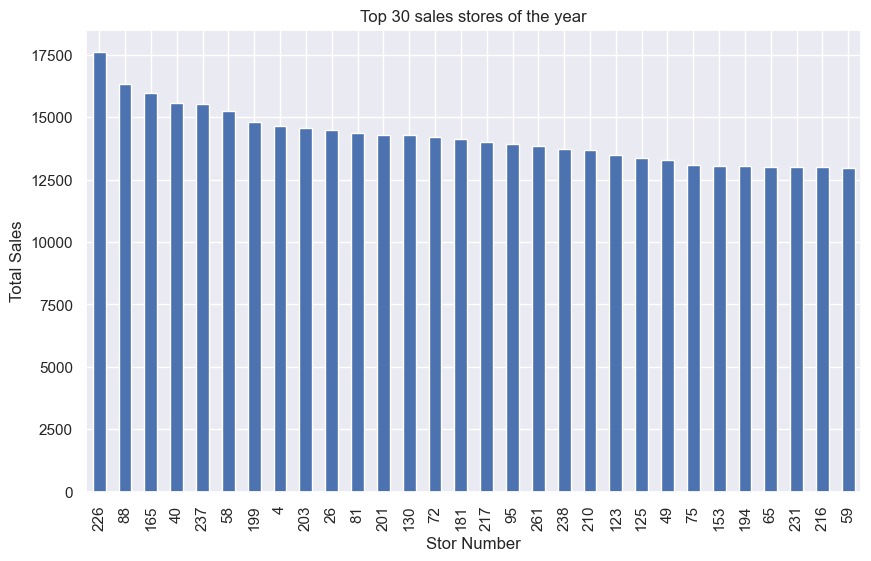

In [77]:
store_Sales.nlargest(30,'all').plot(kind='bar',figsize=(10, 6), title='Top 30 sales stores of the year',
                                            ylabel='Total Sales', xlabel='Stor Number')


In [78]:
store_Sales.nsmallest(10,'all')

STORE_NBR
211    5.2  
76     6.0  
11     6.7  
252    7.4  
206    7.6  
92     9.2  
193    13.1 
85     13.9 
31     14.8 
117    161.8
Name: TOT_SALES, dtype: float64

<AxesSubplot:title={'center':'Least 30 sales stores of the year'}, xlabel='Stor Number', ylabel='Total Sales'>

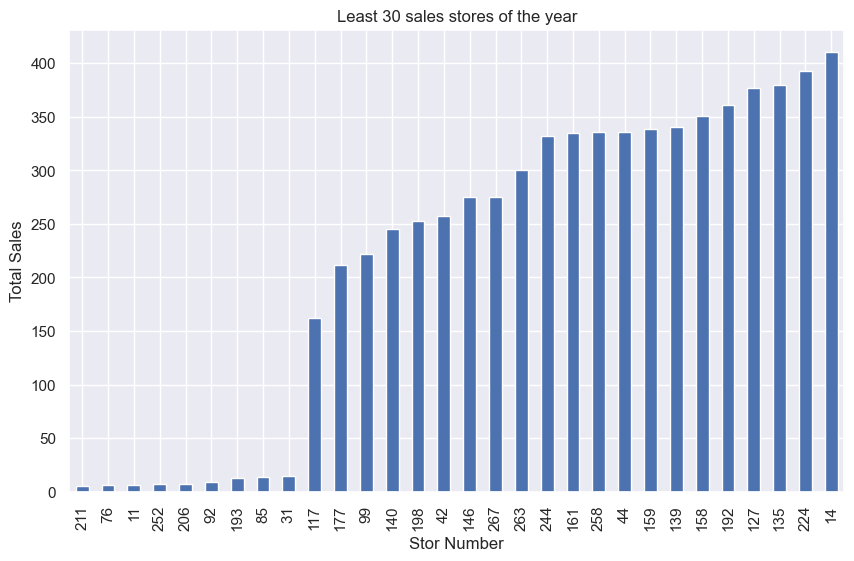

In [79]:
store_Sales.nsmallest(30,'all').plot(kind='bar',figsize=(10, 6), title='Least 30 sales stores of the year',
                                            ylabel='Total Sales', xlabel='Stor Number')

###  Highest and lowest sales Products of the year -----


In [80]:
Products_Sales= merge_data.groupby("PROD_NAME")["TOT_SALES"].sum().sort_values(ascending=False)
Products_Sales

PROD_NAME
Dorito Corn Chp Supreme 380g                39065.0
Smiths Crnkle Chip Orgnl Big Bag 380g       36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Kettle Mozzarella Basil & Pesto 175g        34457.4
Smiths Crinkle Original 330g                34302.6
Cheezels Cheese 330g                        34296.9
Doritos Cheese Supreme 330g                 33390.6
Kettle Sweet Chilli And Sour Cream 175g     33031.8
Kettle Original 175g                        32740.2
Kettle Sea Salt And Vinegar 175g            32589.0
Kettle Honey Soy Chicken 175g               32578.2
Kettle Chilli 175g                          31271.4
Old El Paso Salsa Dip Chnky Tom Ht300g      30513.3
Old El Paso Salsa Dip Tomato Med 300g       30237.9
Old El Paso Salsa Dip Tomato Mild 300g      30033.9
Kettle Tortilla ChpsHny&Jlpno Chili 150g    29021.4
Kettle Sensations Camembert & Fig 150g      28308.4
Twisties Chicken270g                        27853.0
Kettle Tortilla ChpsBtroot&Ricotta 150g     27770.2
Ke

<AxesSubplot:title={'center':'Top 30 prodcuts selling'}, xlabel='Products', ylabel='Total Sales'>

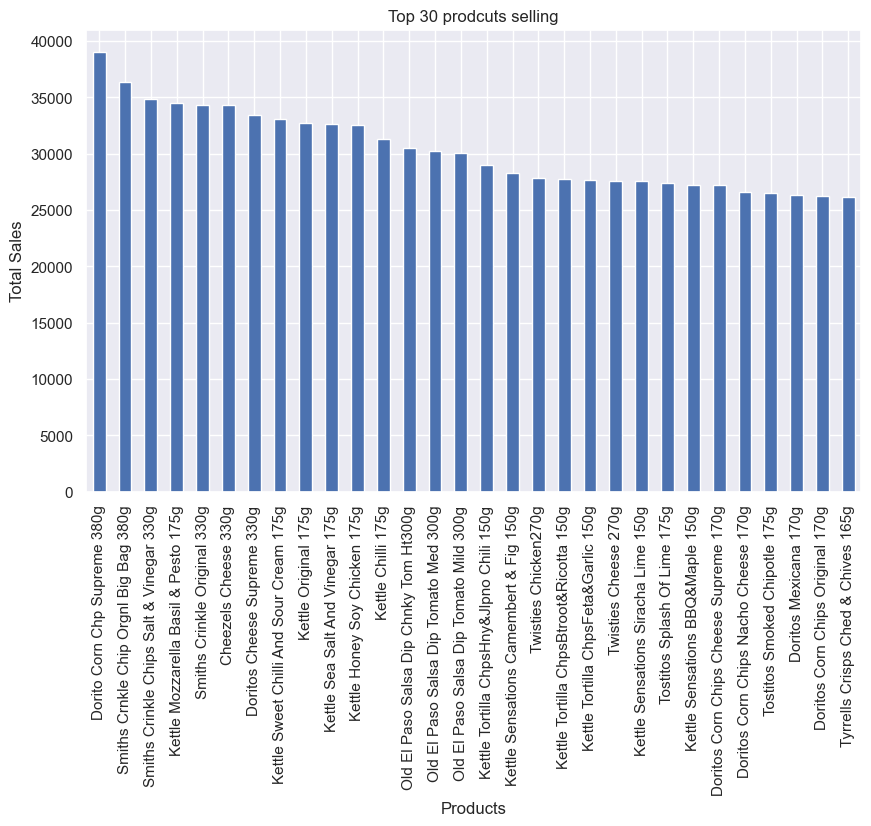

In [81]:
Products_Sales.nlargest(30,'all').plot(kind='bar',figsize=(10, 6), title='Top 30 prodcuts selling',
                                            ylabel='Total Sales', xlabel='Products')


<AxesSubplot:title={'center':'Least 30 prodcuts selling'}, xlabel='Products', ylabel='Total Sales'>

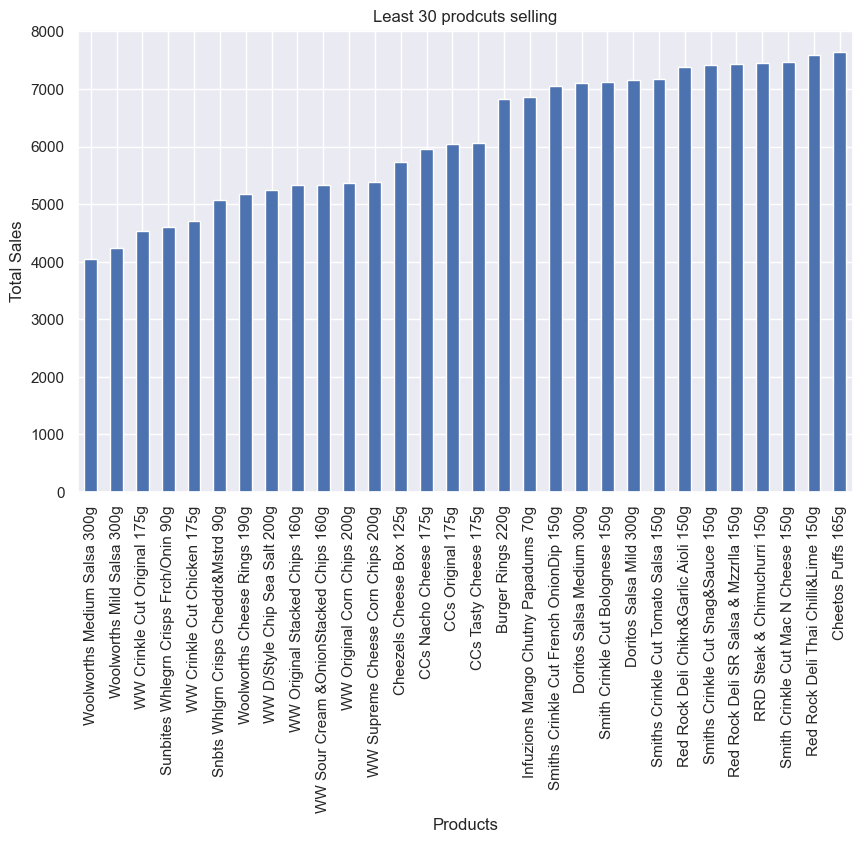

In [82]:
Products_Sales.nsmallest(30,'all').plot(kind='bar',figsize=(10, 6), title='Least 30 prodcuts selling',
                                            ylabel='Total Sales', xlabel='Products')

### LIFESTAGE for all sales stores of the year -----

In [83]:
LIFESTAGE_Sales= merge_data.groupby("LIFESTAGE")["TOT_SALES"].sum().sort_values(ascending=False)
LIFESTAGE_Sales

LIFESTAGE
OLDER SINGLES/COUPLES     402426.75
RETIREES                  366470.90
OLDER FAMILIES            352480.20
YOUNG FAMILIES            316160.10
YOUNG SINGLES/COUPLES     260405.30
MIDAGE SINGLES/COUPLES    184751.30
NEW FAMILIES              50433.45 
Name: TOT_SALES, dtype: float64

In [84]:
type (LIFESTAGE_Sales)

pandas.core.series.Series

/Users/mohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LIFESTAGE'>

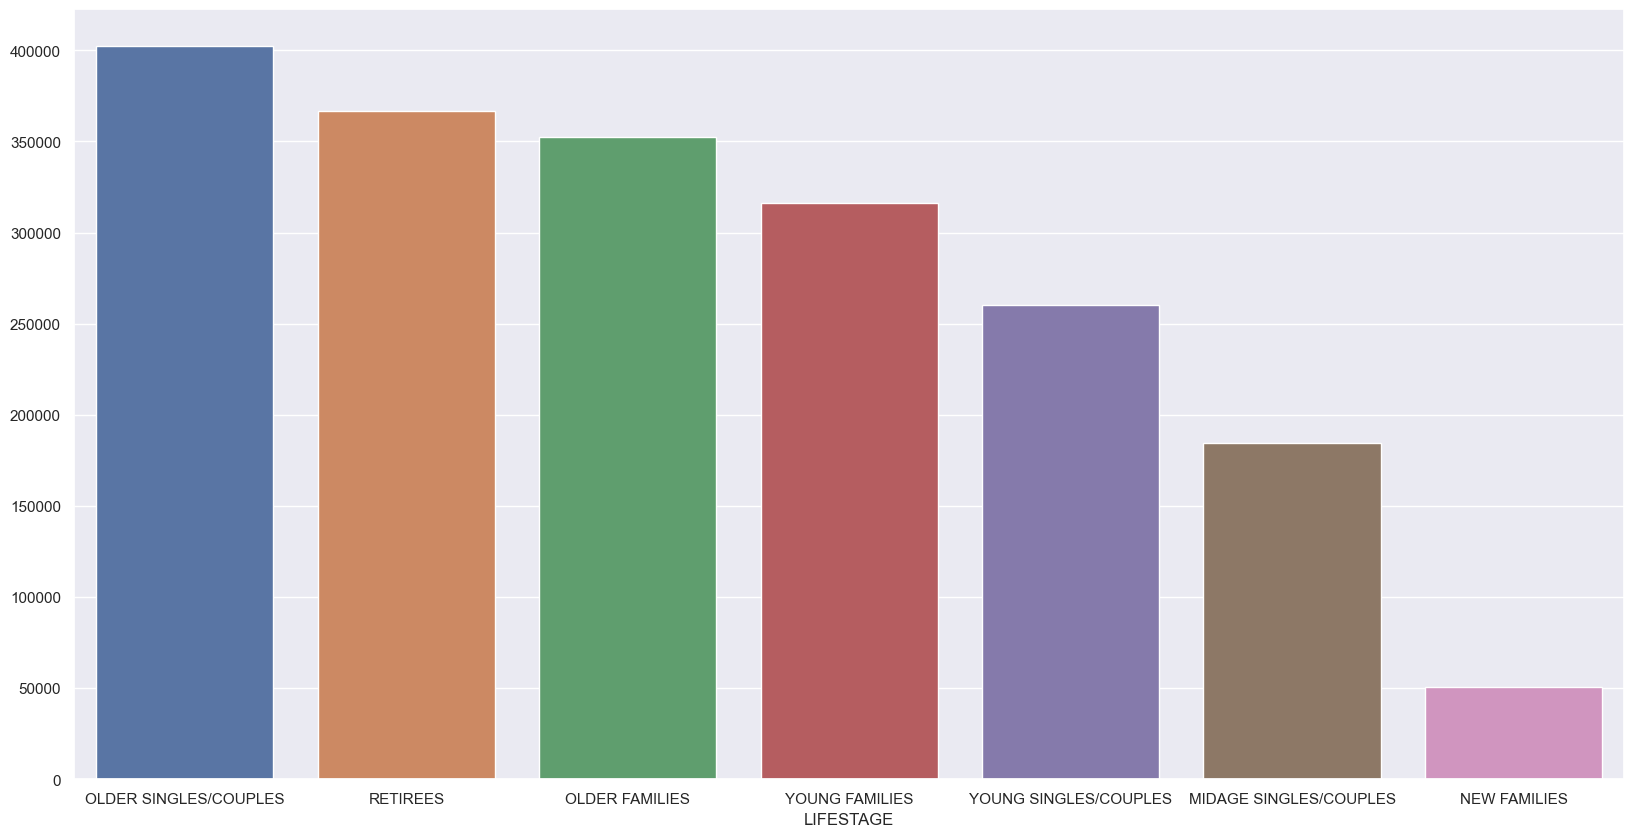

In [85]:
fig_dim = (20, 10)
f, ax = plt.subplots(figsize = fig_dim)
sns.barplot(LIFESTAGE_Sales.index, LIFESTAGE_Sales.values, ax=ax)


In [86]:
merge_data_Daily = merge_data.resample("D").agg({"TOT_SALES":"sum", 
                                                "LYLTY_CARD_NBR":"count"}).sort_values(by='TOT_SALES', 
                                                                                       ascending=False)

In [87]:
merge_data_Daily

,TOT_SALES,LYLTY_CARD_NBR
DATE,,
2018-12-24,6923.00,939
2018-12-23,6826.00,917
2018-12-19,6639.80,906
2018-12-22,6558.70,915
2018-12-20,6300.80,855
...,...,...
2018-08-20,4198.20,693
2019-05-17,4192.45,698
2019-05-15,4060.30,676


<AxesSubplot:xlabel='DATE'>

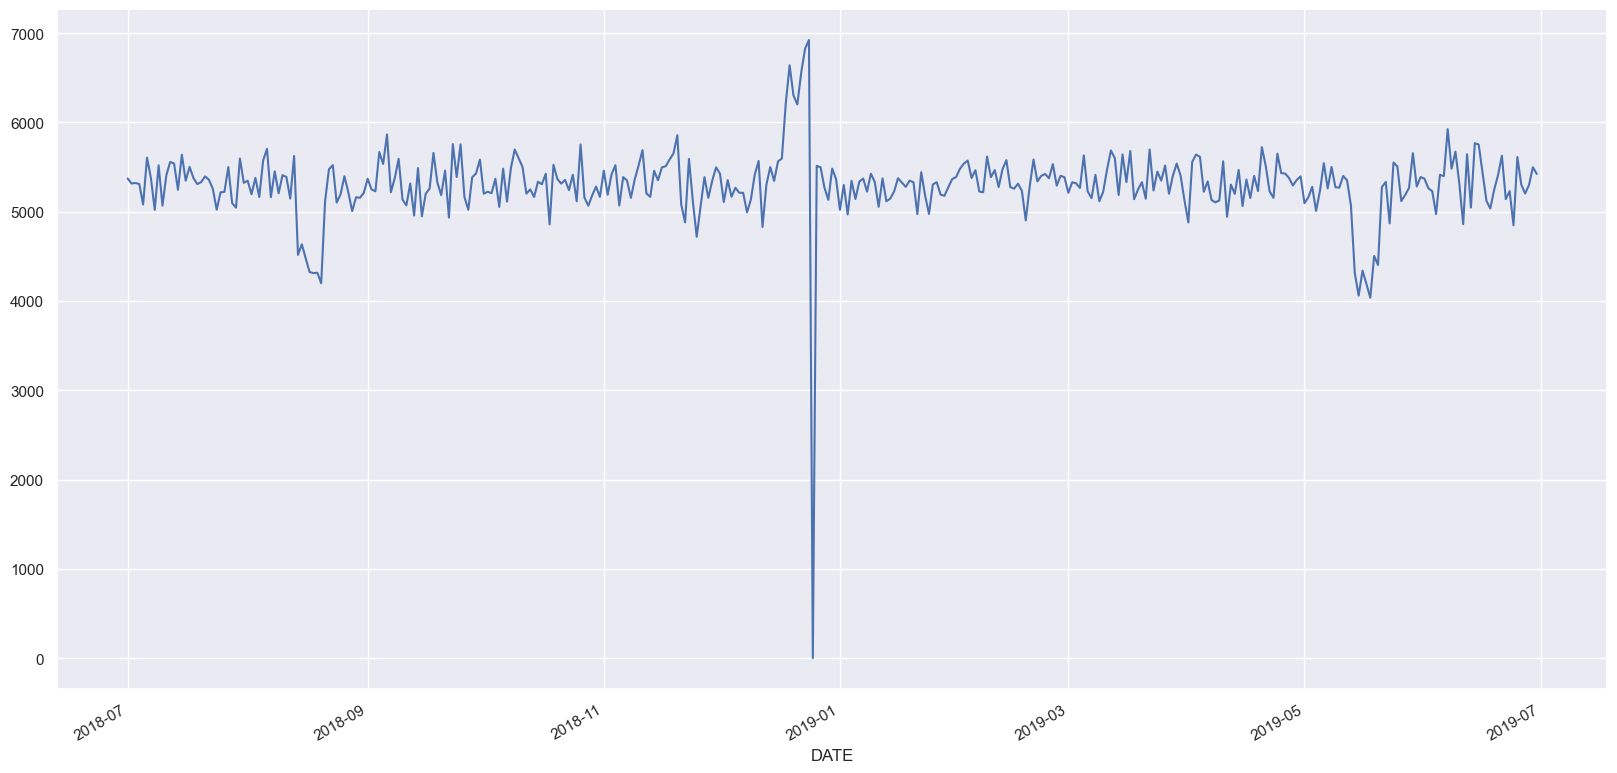

In [88]:
# visualization of Daily total sales -------

merge_data_Daily['TOT_SALES'].plot(figsize=(20,10))

### Trnasactions and sales per month -------

In [89]:
merge_data_monthly = merge_data.resample("M").agg({"TOT_SALES":"sum", "LYLTY_CARD_NBR":"count"})
merge_data_monthly

,TOT_SALES,LYLTY_CARD_NBR
DATE,,
2018-07-31,165275.30,22562
2018-08-31,158087.55,22411
2018-09-30,160522.00,21743
2018-10-31,164415.70,22288
2018-11-30,160233.70,21852
2018-12-31,167913.40,22835
2019-01-31,162642.30,22161
2019-02-28,150665.00,20405
2019-03-31,166265.20,22592


<AxesSubplot:xlabel='DATE'>

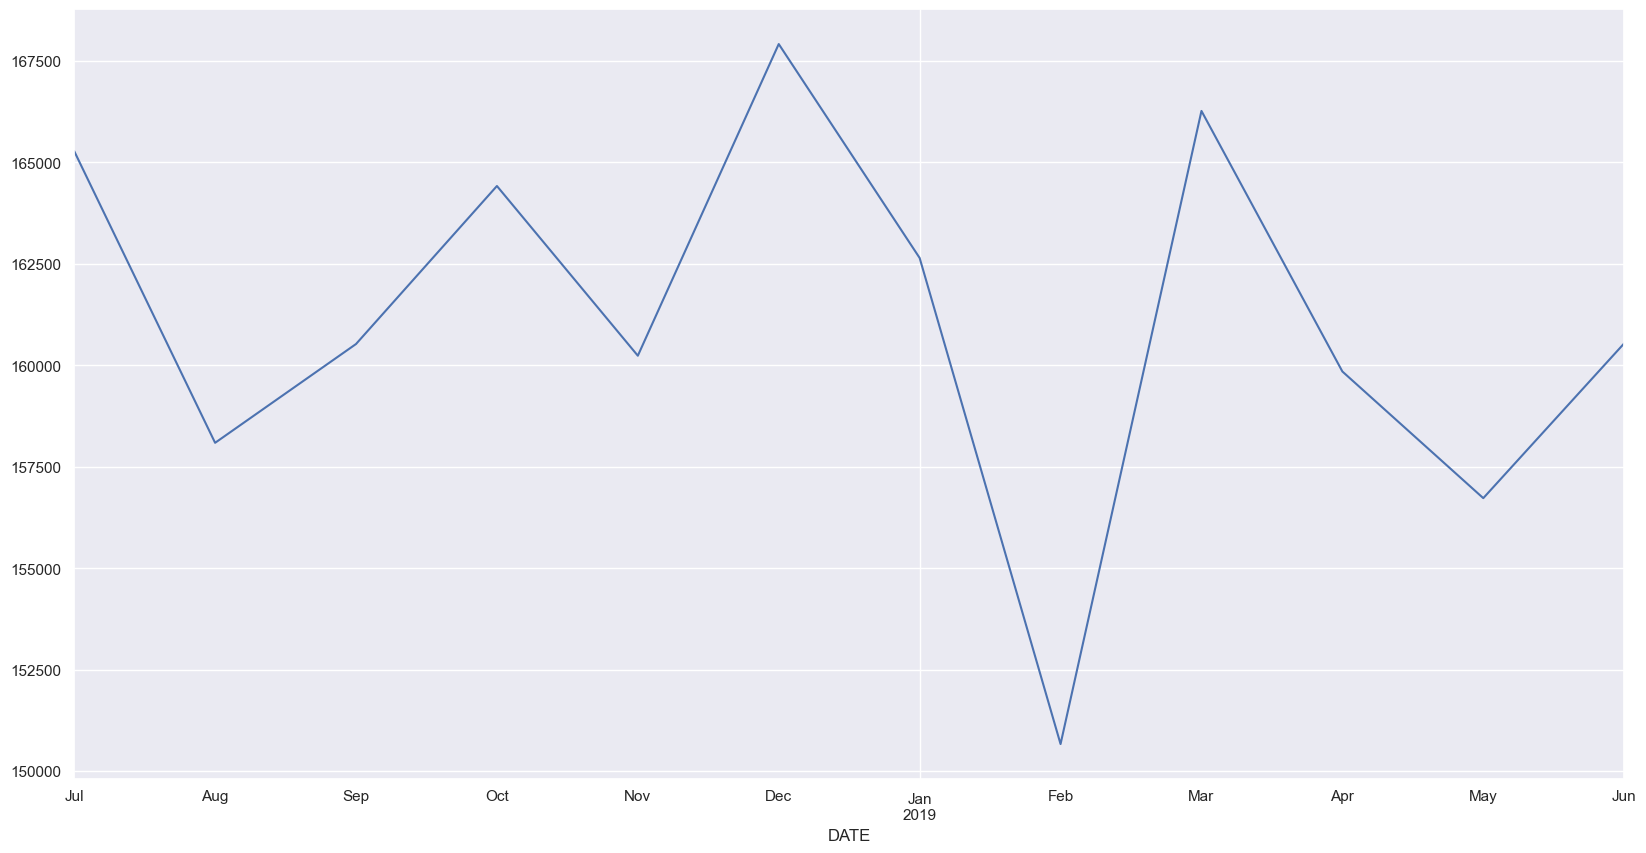

In [90]:
merge_data_monthly['TOT_SALES'].plot(figsize=(20,10))

### Top customers purchasing and sales amount ----

In [91]:
merge_data.pivot_table(index=['LYLTY_CARD_NBR'], values='TOT_SALES', 
                            aggfunc= {'LYLTY_CARD_NBR':"count", 
                                      'TOT_SALES': "sum"}).sort_values(by='TOT_SALES', ascending=False)

,LYLTY_CARD_NBR,TOT_SALES
LYLTY_CARD_NBR,,
230078,17,138.6
63197,15,132.8
259009,15,127.2
162039,18,126.8
58361,14,124.8
...,...,...
51251,1,1.5
41089,1,1.5
2272,1,1.5


In [92]:
# Top 30 customers purchase and transaction

merge_data.pivot_table(index=['LYLTY_CARD_NBR'], values='TOT_SALES', 
                            aggfunc= {'LYLTY_CARD_NBR':"count", 
                                      'TOT_SALES': "sum"}).sort_values(by='TOT_SALES', ascending=False).head(30)

,LYLTY_CARD_NBR,TOT_SALES
LYLTY_CARD_NBR,,
230078,17,138.60
63197,15,132.80
259009,15,127.20
162039,18,126.80
58361,14,124.80
230154,14,124.40
94185,16,122.80
130090,14,122.65
179228,16,120.80


<AxesSubplot:xlabel='LYLTY_CARD_NBR'>

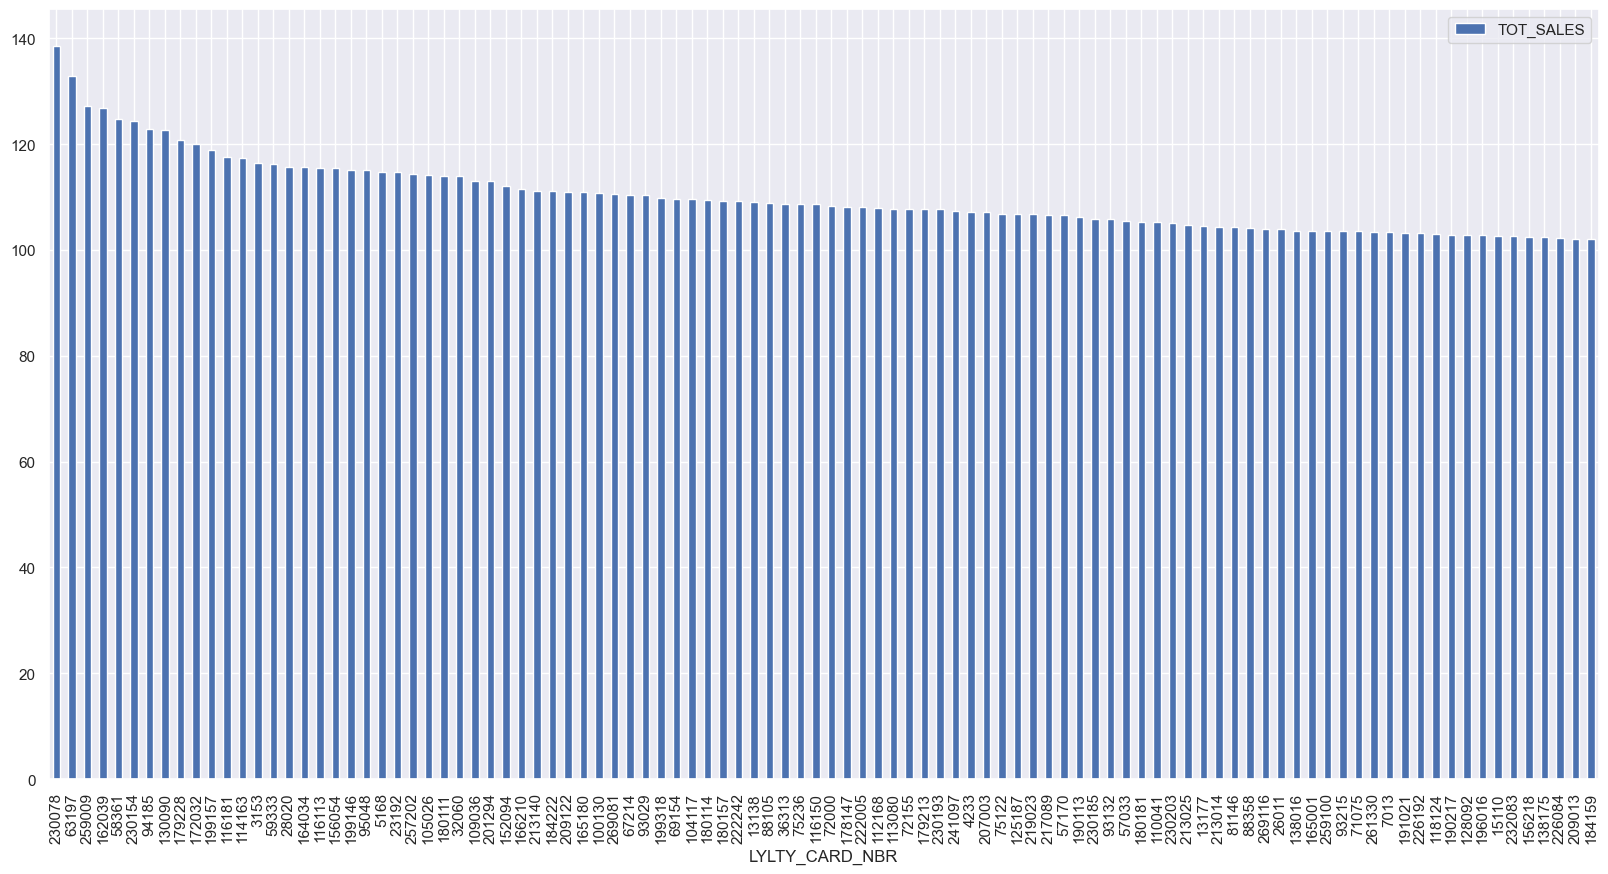

In [93]:
# Top 100 customers purchasing -----

merge_data.pivot_table(index=['LYLTY_CARD_NBR'], values='TOT_SALES', 
                            aggfunc= {'TOT_SALES': "sum"}).sort_values(by='TOT_SALES', 
                                                                       ascending=False).head(100).plot(kind= "bar",figsize=(20,10))

<AxesSubplot:xlabel='LYLTY_CARD_NBR'>

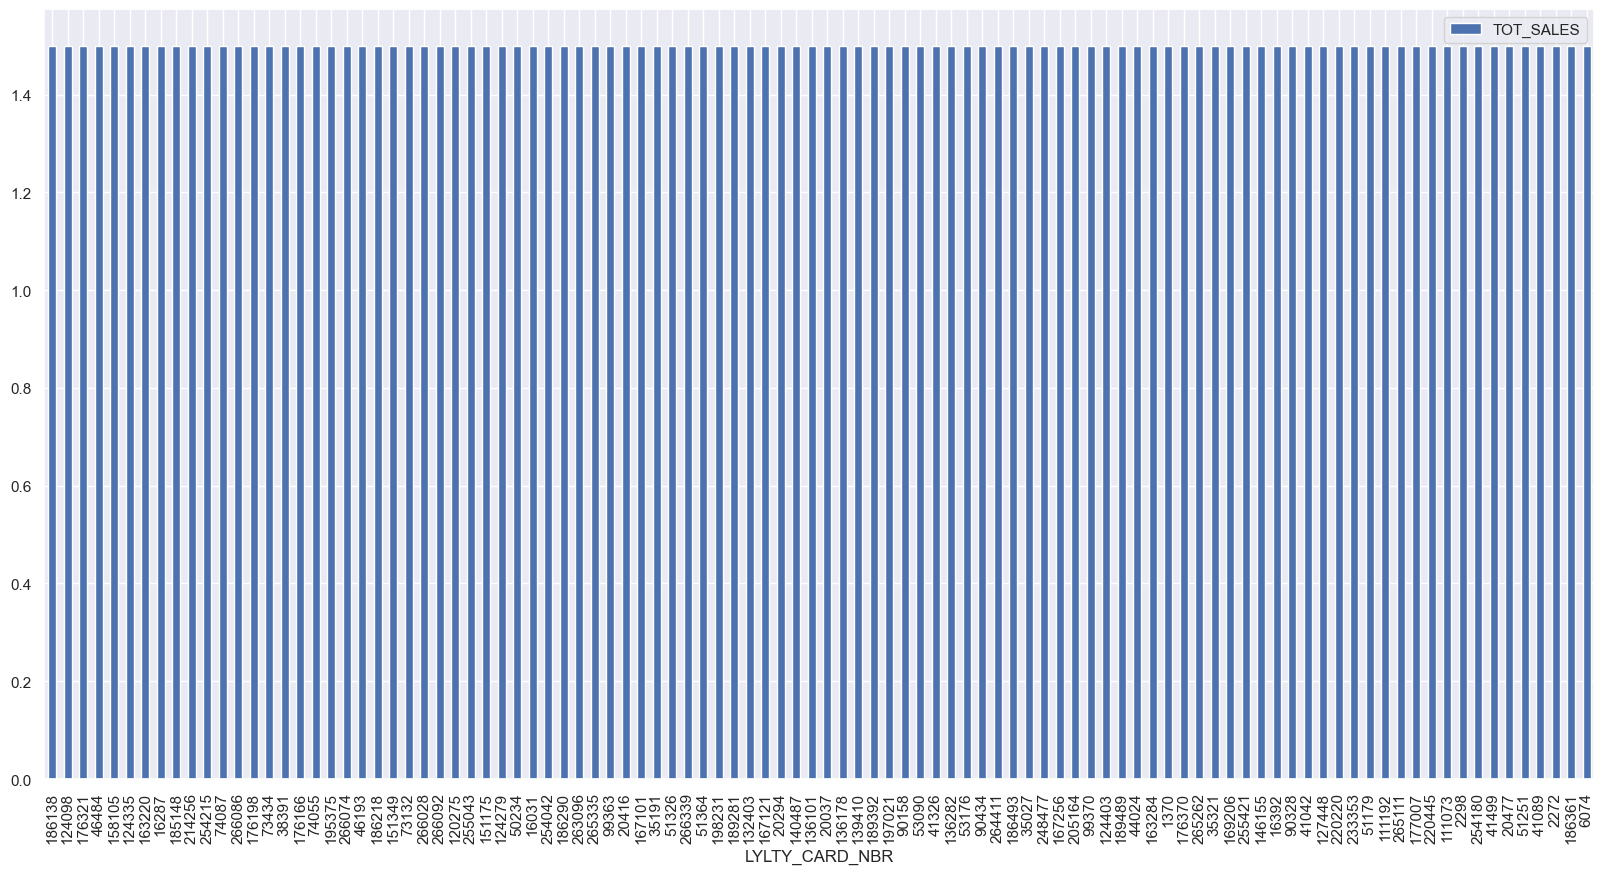

In [94]:
# Lowest 100 customers purchasing -----

merge_data.pivot_table(index=['LYLTY_CARD_NBR'], values='TOT_SALES', 
                            aggfunc= {'TOT_SALES': "sum"}).sort_values(by='TOT_SALES', 
                                                                       ascending=False).tail(100).plot(kind= "bar",figsize=(20,10))

### Average of total purchase per customer ----

In [95]:
# average of total purchase per customer ----

average_purchase_cus= merge_data.pivot_table(index=['LYLTY_CARD_NBR'], values='TOT_SALES', 
                            aggfunc= {'LYLTY_CARD_NBR':"count", 
                                      'TOT_SALES': "sum"}).sort_values(by= 'TOT_SALES', ascending=False)

average_purchase_cus.rename(columns = {'LYLTY_CARD_NBR':'Transaction_Numbers'}, inplace = True)

average_purchase_cus


,Transaction_Numbers,TOT_SALES
LYLTY_CARD_NBR,,
230078,17,138.6
63197,15,132.8
259009,15,127.2
162039,18,126.8
58361,14,124.8
...,...,...
51251,1,1.5
41089,1,1.5
2272,1,1.5


In [96]:
average_purchase_cus["the_average"]= average_purchase_cus['TOT_SALES']/average_purchase_cus['Transaction_Numbers']

average_purchase_cus.round(2)

,Transaction_Numbers,TOT_SALES,the_average
LYLTY_CARD_NBR,,,
230078,17,138.6,8.15
63197,15,132.8,8.85
259009,15,127.2,8.48
162039,18,126.8,7.04
58361,14,124.8,8.91
...,...,...,...
51251,1,1.5,1.50
41089,1,1.5,1.50
2272,1,1.5,1.50


In [97]:
average_purchase_cus.nlargest(50,'TOT_SALES').round(2)

,Transaction_Numbers,TOT_SALES,the_average
LYLTY_CARD_NBR,,,
230078,17,138.60,8.15
63197,15,132.80,8.85
259009,15,127.20,8.48
162039,18,126.80,7.04
58361,14,124.80,8.91
230154,14,124.40,8.89
94185,16,122.80,7.68
130090,14,122.65,8.76
179228,16,120.80,7.55


In [98]:
merge_data.pivot_table(index=['LIFESTAGE'], values='TOT_SALES', 
                            columns= 'STORE_NBR',
                            aggfunc= np.sum,
                       margins=True, 
                       margins_name="Total",
                           ).sort_values(by='LIFESTAGE', ascending=False).head(272)

STORE_NBR,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,Total
LIFESTAGE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
YOUNG SINGLES/COUPLES,744.6,572.5,1896.20,1502.55,836.3,673.4,1653.0,1155.0,986.9,666.60,2.9,1043.4,784.3,78.8,1065.70,449.2,1365.7,867.7,1636.5,798.10,1199.3,990.3,1024.5,1219.4,1151.20,2049.3,1102.8,1277.10,1190.4,773.9,NaN,756.0,1188.9,1122.4,511.9,1958.80,1011.80,901.5,694.00,1408.1,770.1,83.9,967.30,137.0,884.5,976.80,983.90,973.9,2010.4,876.9,573.6,166.8,933.10,1366.75,974.40,600.80,1228.2,1794.50,1852.70,1336.00,168.7,806.9,1075.9,1016.8,2149.25,1303.2,754.7,964.7,917.85,897.2,1060.6,2015.60,925.8,525.0,1292.7,NaN,799.5,1115.70,1737.30,1558.2,2086.00,1176.3,463.3,1331.4,NaN,1036.90,1014.1,1357.40,566.0,740.0,1842.1,NaN,1239.3,988.10,1905.95,1097.6,768.80,468.5,61.0,1061.1,438.6,815.1,957.3,657.2,514.6,939.70,656.3,1155.5,956.4,724.0,706.8,912.4,1095.5,891.70,1017.00,1209.7,46.4,711.10,1390.2,559.65,1073.2,1222.4,1987.3,513.4,1648.35,1183.3,119.4,981.2,903.4,1685.90,607.1,171.4,1231.70,1352.25,106.1,571.8,1016.00,1358.4,103.9,72.2,840.0,1498.3,1284.00,720.00,937.8,71.8,991.80,1737.9,1113.70,1047.5,452.6,677.6,1811.00,1814.00,927.55,823.2,984.4,57.6,120.7,814.50,37.9,771.1,764.6,729.5,2117.70,2082.10,627.1,731.75,1087.6,859.8,1186.80,1273.3,1091.45,1156.1,1876.6,749.0,76.5,708.5,766.7,1071.8,1430.40,1068.2,868.1,643.00,855.1,469.1,871.7,718.5,324.3,923.2,535.3,78.5,5.5,1602.00,719.60,623.0,1103.9,78.7,1819.2,1152.9,1531.0,1453.75,2157.4,151.6,909.3,4.6,606.1,972.10,849.7,1506.10,NaN,991.00,1282.1,657.1,1110.9,1818.7,1803.8,65.9,1255.9,746.9,1879.45,751.2,1524.00,98.3,888.1,1665.00,669.4,1158.6,1186.5,916.7,1485.30,893.8,754.2,1354.4,1427.70,770.4,1718.6,2025.45,1047.00,1427.9,798.0,1321.4,1091.9,103.30,1053.4,1459.6,1022.7,1168.6,821.1,1696.2,1227.10,NaN,1279.2,364.3,718.2,896.8,675.8,105.4,1161.5,1102.50,2245.50,1074.2,102.4,871.6,684.4,536.3,79.2,651.30,729.8,974.60,991.1,1144.10,260405.30
YOUNG FAMILIES,205.2,201.0,1726.30,1917.30,2178.3,273.4,1538.3,325.4,398.1,2110.35,NaN,396.2,2190.2,68.4,2098.10,174.4,486.0,294.3,1138.9,200.80,637.7,329.3,2467.9,1626.7,470.80,2244.6,526.5,1706.10,473.8,2068.2,NaN,2315.5,2545.6,383.2,177.9,1404.30,479.65,324.4,1919.30,2295.3,227.5,25.5,2978.95,61.8,1417.8,267.20,407.30,1856.4,1352.7,238.2,98.2,24.1,324.20,380.90,2129.30,1516.75,2182.7,1895.00,1981.40,1440.75,88.4,1940.1,2600.5,480.7,1611.80,642.6,2072.9,352.8,2520.80,1909.0,2411.3,1619.00,434.8,267.0,1357.7,NaN,265.4,1701.10,1503.60,1482.5,1566.10,402.2,2173.1,751.0,NaN,1913.35,473.1,2538.30,345.0,342.5,1176.9,NaN,2842.0,2855.00,2319.40,369.7,2521.55,149.6,23.7,2977.0,1898.3,2673.0,292.4,2693.7,2417.2,2074.60,1508.4,543.1,1567.8,1799.6,266.4,2866.5,2643.1,2459.85,407.30,2698.0,22.2,1389.80,1307.8,148.50,378.1,1757.5,1528.3,230.6,1447.30,430.2,48.4,2158.3,2315.1,1407.15,309.1,34.

### Working with PREMIUM_CUSTOMER -----

In [99]:
# Category of PREMIUM_CUSTOMER per store ------
merge_data.pivot_table(index=['PREMIUM_CUSTOMER'], values='TOT_SALES', 
                            columns= 'STORE_NBR',
                            aggfunc= np.sum).sort_values(by='PREMIUM_CUSTOMER', ascending=False)

STORE_NBR,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272
PREMIUM_CUSTOMER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Premium,536.2,461.6,3271.65,3720.10,2809.4,723.2,3331.2,1151.7,1125.6,3192.65,3.8,1061.1,2732.6,88.6,2559.00,507.1,1216.4,995.7,2041.8,621.85,1579.3,833.7,3220.4,2295.4,1121.00,3904.8,1305.5,2205.85,1190.8,2719.0,NaN,2808.7,3050.6,1000.7,327.9,2764.50,1278.95,804.1,2629.90,4134.8,661.4,94.3,2960.00,117.6,2545.7,744.20,1134.55,2502.0,3618.8,793.7,559.6,171.6,721.30,1216.10,3036.30,2505.10,2824.8,3300.65,3630.90,3344.75,125.0,2576.0,3152.1,1265.2,3919.20,1192.8,2626.6,1130.9,3325.20,2371.1,2785.40,4027.75,1023.5,592.6,3271.3,NaN,768.2,2135.20,2826.50,2865.4,3257.60,938.6,2209.0,1250.4,2.1,2848.60,891.2,4748.90,498.7,750.0,3212.6,NaN,2777.4,2813.50,3904.8,849.2,2735.90,401.4,53.5,3978.3,2735.4,2835.0,1005.2,2581.7,3357.6,3154.75,2199.5,740.0,2380.5,2907.1,651.1,2878.2,2825.9,3533.65,926.10,2660.8,33.5,2840.50,3461.5,525.65,873.3,2318.0,3515.2,530.2,3287.40,792.1,102.0,3203.0,2627.3,3561.60,559.0,133.0,2936.15,1340.90,108.2,575.1,3219.50,2582.3,111.9,24.6,765.1,1513.7,1028.7,2046.85,815.2,34.9,2547.45,2395.2,1139.45,1490.4,422.0,2750.4,3733.25,3658.50,2054.50,2886.5,3482.2,103.6,39.0,2354.55,102.0,2900.0,701.0,3130.6,5188.50,2992.40,604.0,2661.00,986.5,1215.6,1104.80,2970.5,1530.20,1103.3,2603.7,761.3,59.2,3067.3,3194.4,2955.9,4045.10,935.8,3123.7,3691.20,748.7,449.5,646.6,764.0,411.5,2689.3,2764.9,127.4,NaN,3589.40,831.90,3129.4,926.2,70.7,3891.7,1393.1,4164.2,1660.60,4225.6,128.2,856.9,NaN,2697.8,2278.90,2552.9,3055.90,NaN,2242.90,3395.7,641.9,1132.8,2588.3,3975.3,93.2,2120.8,733.0,2740.75,2299.3,2992.15,117.7,3146.9,4136.75,2964.9,1098.6,3182.7,2963.3,2939.4,2741.6,791.1,1015.2,1275.70,2731.6,4219.8,3457.0,964.55,1248.1,2855.6,1318.3,1353.7,114.20,1070.3,1420.0,2904.4,1192.8,881.2,3390.6,1217.30,7.4,1138.0,365.5,855.0,752.1,3117.7,84.8,3348.1,1190.70,3435.60,2218.9,55.6,680.3,675.4,510.1,62.4,601.80,3141.6,2792.55,2767.3,1210.40
Mainstream,1075.7,843.3,4932.60,6357.40,3111.4,1154.3,4420.4,2314.8,1457.8,3618.05,NaN,2336.4,4483.1,128.3,3562.15,597.8,1965.2,1146.9,3814.7,1010.90,2198.0,1702.9,3031.6,3120.3,2469.70,6131.1,2169.5,3971.60,2094.2,3755.7,6.0,3597.2,4105.1,2004.5,734.6,5093.90,1950.20,1090.6,3405.05,6006.5,1184.5,93.0,4381.90,90.8,3239.8,1183.65,1820.00,3759.4,5507.3,1102.0,832.7,172.7,1322.25,2738.15,3877.40,3071.20,3899.3,6425.20,5332.15,5195.75,243.2,3869.1,4913.2,1828.3,4868.45,2243.5,3522.2,1624.0,3839.05,3766.5,4838.65,5911.40,1579.1,828.3,4707.0,6.0,1194.3,3519.50,4661.45,5260.2,6024.55,1791.2,3836.5,2140.8,NaN,4337.60,1655.3,5855.15,950.7,1451.1,4609.5,9.2,4650.3,3979.10,5229.6,2464.6,3847.00,697.7,82.7,3635.7,3772.5,3789.2,1421.4,4057.7,3104.5,3433.90,4118.6,1974.0,4235.1,3627.2,857.3,4009.5,3456.0,4166.05,1839.05,3357.4,70.9,3516.75,3666.0,745.50,1559.5,32

In [100]:
# Check which of the PREMIUM CUSTOMER categories are the most purchased----

merge_data.groupby("PREMIUM_CUSTOMER")['TOT_SALES'].sum().sort_values(ascending=False)


PREMIUM_CUSTOMER
Mainstream    750744.50
Budget        676211.55
Premium       506171.95
Name: TOT_SALES, dtype: float64

<AxesSubplot:xlabel='PREMIUM_CUSTOMER'>

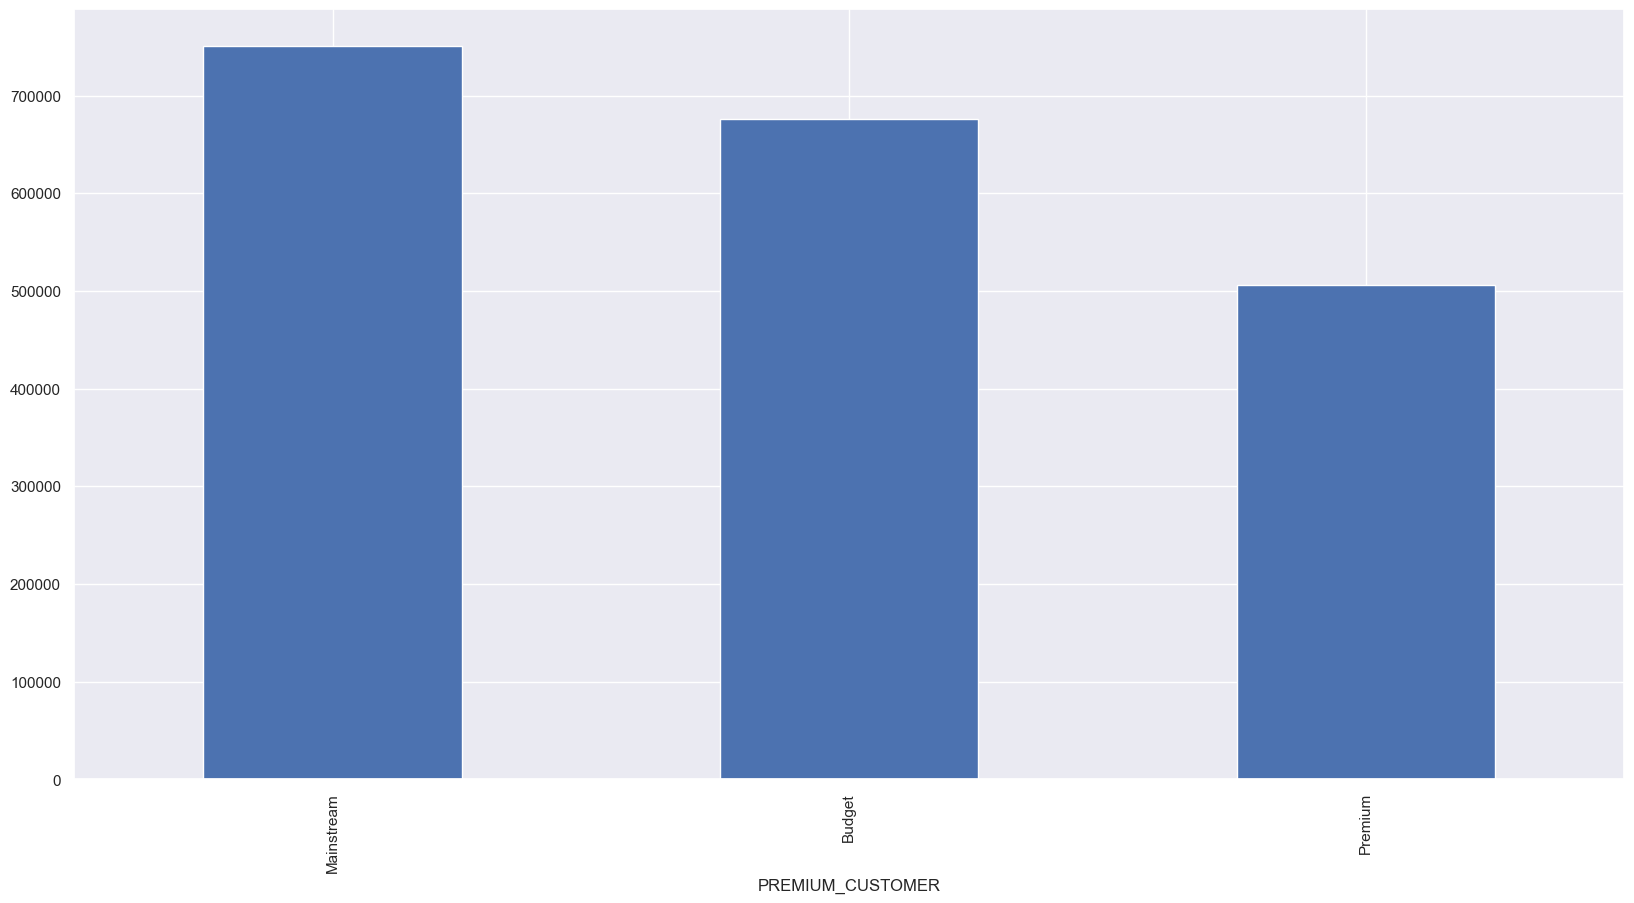

In [101]:

merge_data.groupby("PREMIUM_CUSTOMER")['TOT_SALES'].sum().sort_values(ascending=False).plot(kind= "bar",figsize=(20,10))

### Working with LIFESTAGE -----

In [102]:
# Check which of the LIFESTAGE categories are the most purchased----

merge_data.groupby("LIFESTAGE")['TOT_SALES'].sum().sort_values(ascending=False)

LIFESTAGE
OLDER SINGLES/COUPLES     402426.75
RETIREES                  366470.90
OLDER FAMILIES            352480.20
YOUNG FAMILIES            316160.10
YOUNG SINGLES/COUPLES     260405.30
MIDAGE SINGLES/COUPLES    184751.30
NEW FAMILIES              50433.45 
Name: TOT_SALES, dtype: float64

<AxesSubplot:xlabel='LIFESTAGE'>

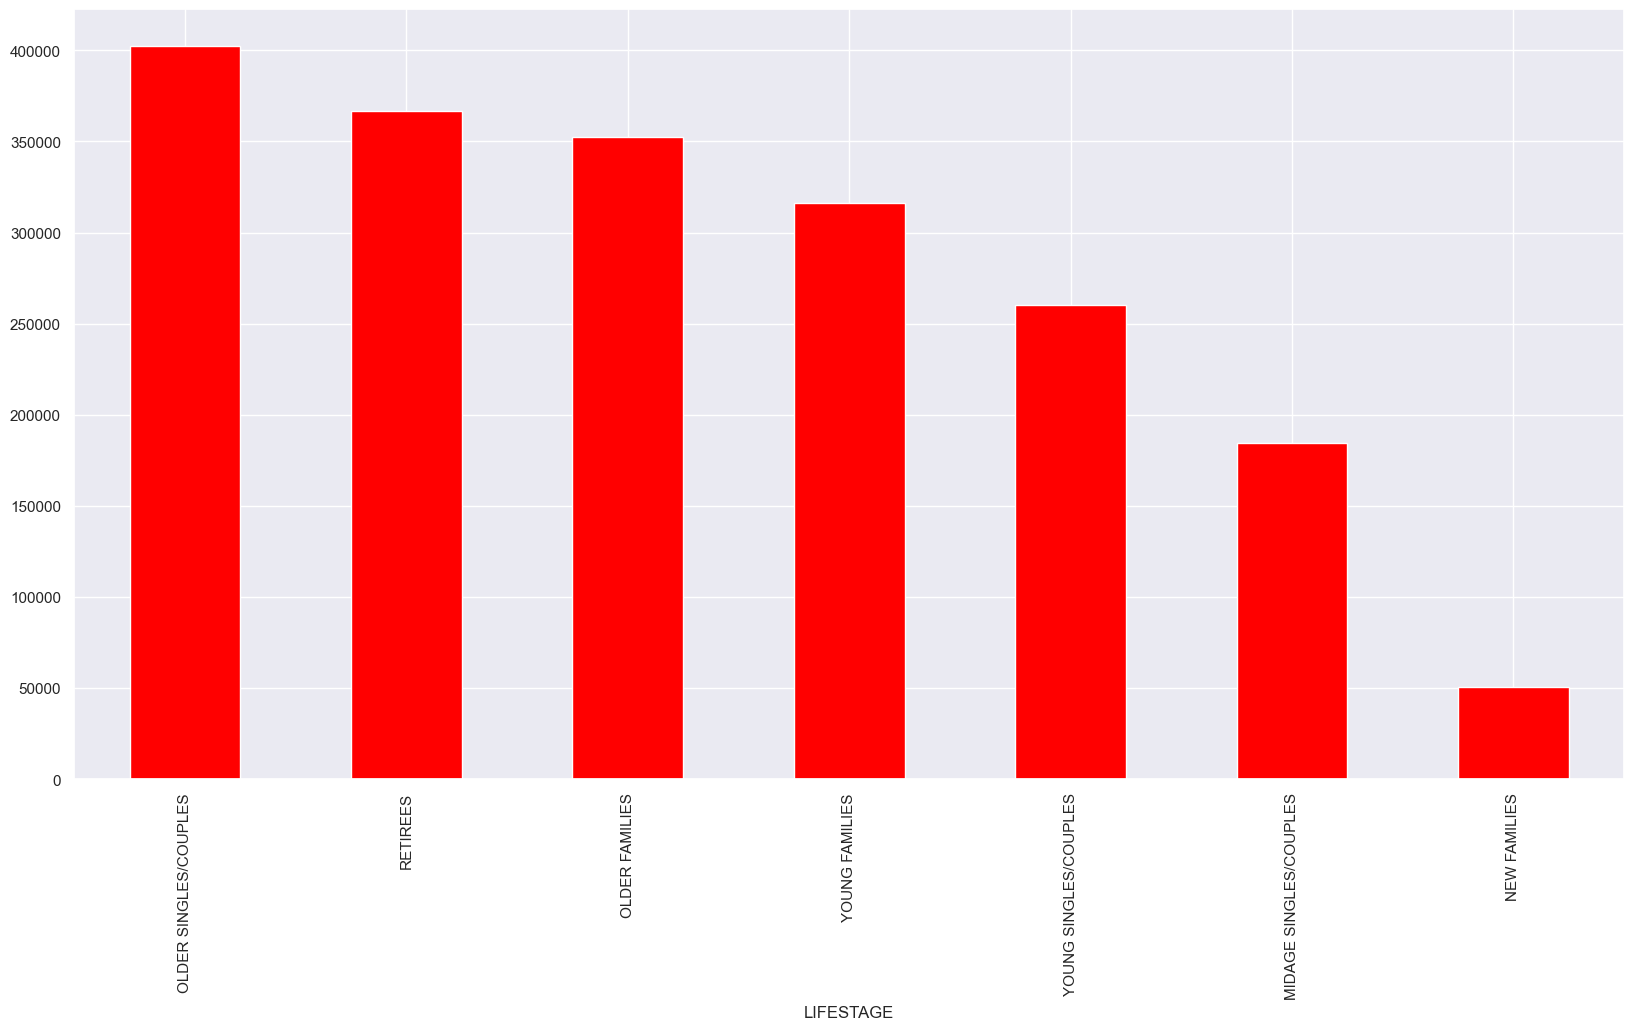

In [103]:
merge_data.groupby("LIFESTAGE")['TOT_SALES'].sum().sort_values(ascending=False).plot(kind= "bar", 
                                                                                     color="red",figsize=(20,10))

In [104]:
merge_data.pivot_table(index=['LIFESTAGE'], values='TOT_SALES', 
                            columns= 'STORE_NBR',
                            aggfunc= np.sum).sort_values(by='LIFESTAGE', ascending=False)

STORE_NBR,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272
LIFESTAGE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
YOUNG SINGLES/COUPLES,744.6,572.5,1896.20,1502.55,836.3,673.4,1653.0,1155.0,986.9,666.60,2.9,1043.4,784.3,78.8,1065.70,449.2,1365.7,867.7,1636.5,798.10,1199.3,990.3,1024.5,1219.4,1151.20,2049.3,1102.8,1277.10,1190.4,773.9,NaN,756.0,1188.9,1122.4,511.9,1958.80,1011.80,901.5,694.00,1408.1,770.1,83.9,967.30,137.0,884.5,976.80,983.90,973.9,2010.4,876.9,573.6,166.8,933.10,1366.75,974.40,600.80,1228.2,1794.50,1852.70,1336.00,168.7,806.9,1075.9,1016.8,2149.25,1303.2,754.7,964.7,917.85,897.2,1060.6,2015.60,925.8,525.0,1292.7,NaN,799.5,1115.70,1737.30,1558.2,2086.00,1176.3,463.3,1331.4,NaN,1036.90,1014.1,1357.40,566.0,740.0,1842.1,NaN,1239.3,988.10,1905.95,1097.6,768.80,468.5,61.0,1061.1,438.6,815.1,957.3,657.2,514.6,939.70,656.3,1155.5,956.4,724.0,706.8,912.4,1095.5,891.70,1017.00,1209.7,46.4,711.10,1390.2,559.65,1073.2,1222.4,1987.3,513.4,1648.35,1183.3,119.4,981.2,903.4,1685.90,607.1,171.4,1231.70,1352.25,106.1,571.8,1016.00,1358.4,103.9,72.2,840.0,1498.3,1284.00,720.00,937.8,71.8,991.80,1737.9,1113.70,1047.5,452.6,677.6,1811.00,1814.00,927.55,823.2,984.4,57.6,120.7,814.50,37.9,771.1,764.6,729.5,2117.70,2082.10,627.1,731.75,1087.6,859.8,1186.80,1273.3,1091.45,1156.1,1876.6,749.0,76.5,708.5,766.7,1071.8,1430.40,1068.2,868.1,643.00,855.1,469.1,871.7,718.5,324.3,923.2,535.3,78.5,5.5,1602.00,719.60,623.0,1103.9,78.7,1819.2,1152.9,1531.0,1453.75,2157.4,151.6,909.3,4.6,606.1,972.10,849.7,1506.10,NaN,991.00,1282.1,657.1,1110.9,1818.7,1803.8,65.9,1255.9,746.9,1879.45,751.2,1524.00,98.3,888.1,1665.00,669.4,1158.6,1186.5,916.7,1485.30,893.8,754.2,1354.4,1427.70,770.4,1718.6,2025.45,1047.00,1427.9,798.0,1321.4,1091.9,103.30,1053.4,1459.6,1022.7,1168.6,821.1,1696.2,1227.10,NaN,1279.2,364.3,718.2,896.8,675.8,105.4,1161.5,1102.50,2245.50,1074.2,102.4,871.6,684.4,536.3,79.2,651.30,729.8,974.60,991.1,1144.10
YOUNG FAMILIES,205.2,201.0,1726.30,1917.30,2178.3,273.4,1538.3,325.4,398.1,2110.35,NaN,396.2,2190.2,68.4,2098.10,174.4,486.0,294.3,1138.9,200.80,637.7,329.3,2467.9,1626.7,470.80,2244.6,526.5,1706.10,473.8,2068.2,NaN,2315.5,2545.6,383.2,177.9,1404.30,479.65,324.4,1919.30,2295.3,227.5,25.5,2978.95,61.8,1417.8,267.20,407.30,1856.4,1352.7,238.2,98.2,24.1,324.20,380.90,2129.30,1516.75,2182.7,1895.00,1981.40,1440.75,88.4,1940.1,2600.5,480.7,1611.80,642.6,2072.9,352.8,2520.80,1909.0,2411.3,1619.00,434.8,267.0,1357.7,NaN,265.4,1701.10,1503.60,1482.5,1566.10,402.2,2173.1,751.0,NaN,1913.35,473.1,2538.30,345.0,342.5,1176.9,NaN,2842.0,2855.00,2319.40,369.7,2521.55,149.6,23.7,2977.0,1898.3,2673.0,292.4,2693.7,2417.2,2074.60,1508.4,543.1,1567.8,1799.6,266.4,2866.5,2643.1,2459.85,407.30,2698.0,22.2,1389.80,1307.8,148.50,378.1,1757.5,1528.3,230.6,1447.30,430.2,48.4,2158.3,2315.1,1407.15,309.1,34.6,2422.90,471.30,

#### Numbers of transactions per LIFESTAGE ----- 

In [105]:
merge_data.pivot_table(index=['LIFESTAGE'], values='LYLTY_CARD_NBR',
                                                 margins=True,
                                                aggfunc='count').sort_values(by='LIFESTAGE',ascending=False)

,LYLTY_CARD_NBR
LIFESTAGE,
YOUNG SINGLES/COUPLES,36377
YOUNG FAMILIES,43592
RETIREES,49763
OLDER SINGLES/COUPLES,54479
OLDER FAMILIES,48596
NEW FAMILIES,6919
MIDAGE SINGLES/COUPLES,25110
All,264836


<AxesSubplot:xlabel='LIFESTAGE', ylabel='count'>

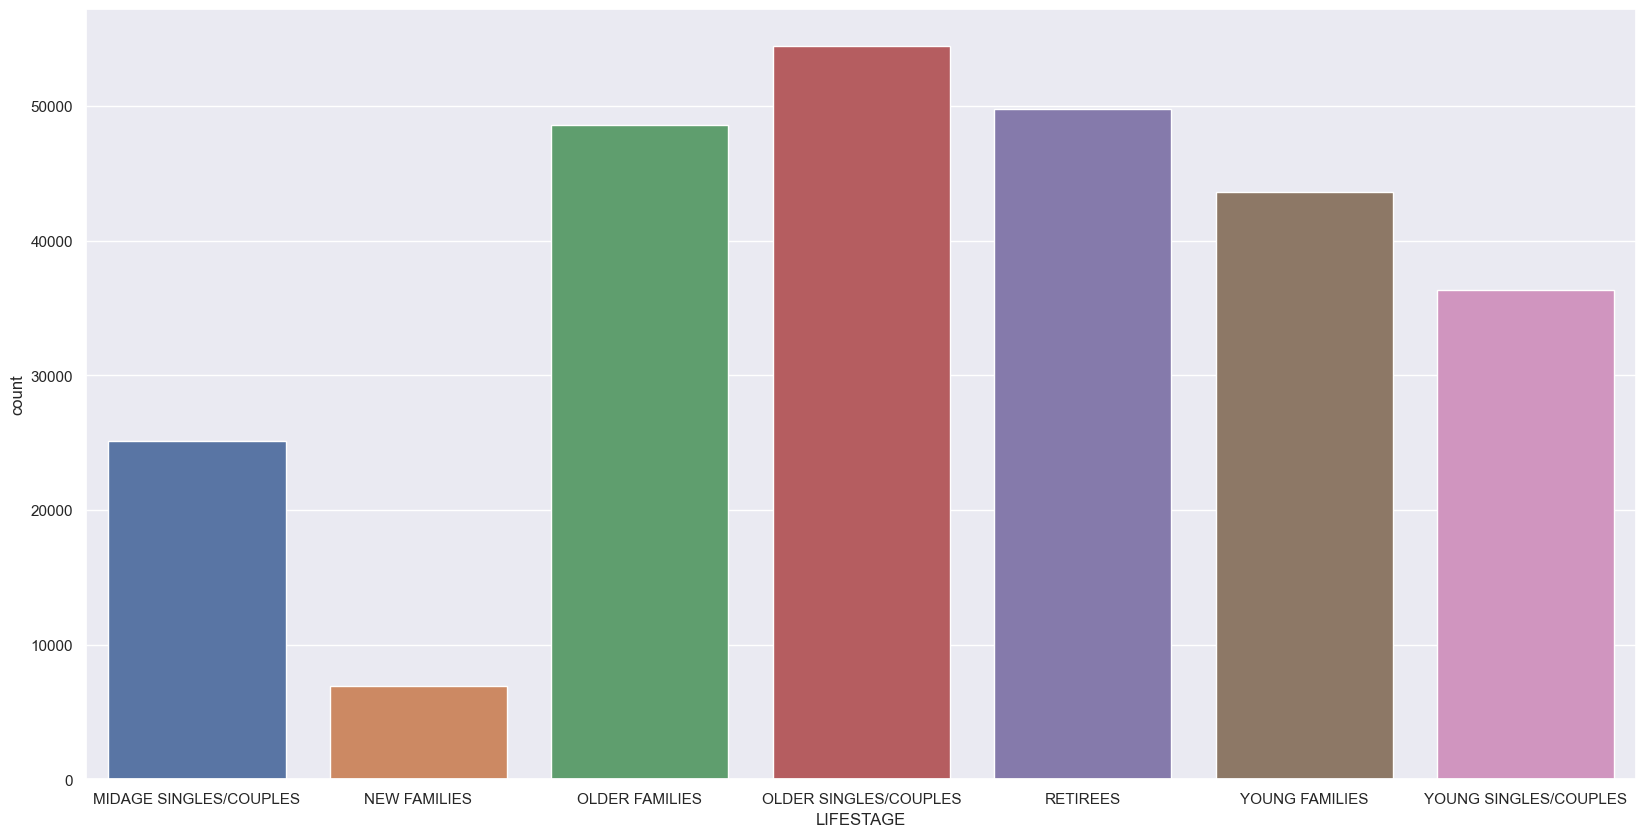

In [106]:
fig_dim = (20, 10)
f, ax = plt.subplots(figsize = fig_dim)
sns.countplot( data=merge_data, x='LIFESTAGE', ax=ax)


### Create a new data conatins sotres numbers 77, 86, and 88 ----

In [107]:
stores_77_86_88 = merge_data[(merge_data["STORE_NBR"] == 77 ) | 
                      (merge_data["STORE_NBR"] == 86)|
                      (merge_data["STORE_NBR"] == 88)]


In [108]:
stores_77_86_88

,STORE_NBR,LYLTY_CARD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Net_Weight,LIFESTAGE,PREMIUM_CUSTOMER
DATE,,,,,,,,
2018-07-01,88,88076,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,150g,MIDAGE SINGLES/COUPLES,Mainstream
2019-02-25,88,88076,Pringles Slt Vingar 134g,2,7.4,134g,MIDAGE SINGLES/COUPLES,Mainstream
2019-03-19,88,88076,Pringles SourCream Onion 134g,2,7.4,134g,MIDAGE SINGLES/COUPLES,Mainstream
2018-07-01,88,88140,Pringles SourCream Onion 134g,2,7.4,134g,MIDAGE SINGLES/COUPLES,Mainstream
2019-02-21,88,88140,Kettle Chilli 175g,2,10.8,175g,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...
2019-06-22,77,77438,Kettle Sea Salt And Vinegar 175g,2,10.8,175g,NEW FAMILIES,Budget
2019-06-22,77,77235,Pringles Chicken Salt Crips 134g,2,7.4,134g,RETIREES,Budget
2019-06-22,77,2330081,Doritos Corn Chips Cheese Supreme 170g,2,8.8,170g,RETIREES,Mainstream


In [109]:
stores_77_86_88.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3974 entries, 2018-07-01 to 2019-06-29
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   STORE_NBR         3974 non-null   int64  
 1   LYLTY_CARD_NBR    3974 non-null   int64  
 2   PROD_NAME         3974 non-null   object 
 3   PROD_QTY          3974 non-null   int64  
 4   TOT_SALES         3974 non-null   float64
 5   Net_Weight        3974 non-null   object 
 6   LIFESTAGE         3974 non-null   object 
 7   PREMIUM_CUSTOMER  3974 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 279.4+ KB


In [110]:
stores_77_86_88.reset_index(inplace=True)

In [111]:
stores_77_86_88

,DATE,STORE_NBR,LYLTY_CARD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Net_Weight,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-01,88,88076,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,150g,MIDAGE SINGLES/COUPLES,Mainstream
1,2019-02-25,88,88076,Pringles Slt Vingar 134g,2,7.4,134g,MIDAGE SINGLES/COUPLES,Mainstream
2,2019-03-19,88,88076,Pringles SourCream Onion 134g,2,7.4,134g,MIDAGE SINGLES/COUPLES,Mainstream
3,2018-07-01,88,88140,Pringles SourCream Onion 134g,2,7.4,134g,MIDAGE SINGLES/COUPLES,Mainstream
4,2019-02-21,88,88140,Kettle Chilli 175g,2,10.8,175g,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...
3969,2019-06-22,77,77438,Kettle Sea Salt And Vinegar 175g,2,10.8,175g,NEW FAMILIES,Budget
3970,2019-06-22,77,77235,Pringles Chicken Salt Crips 134g,2,7.4,134g,RETIREES,Budget
3971,2019-06-22,77,2330081,Doritos Corn Chips Cheese Supreme 170g,2,8.8,170g,RETIREES,Mainstream
3972,2019-06-28,77,77076,RRD Sweet Chilli & Sour Cream 165g,2,6.0,165g,YOUNG SINGLES/COUPLES,Budget


In [112]:
# Convert Month Number to Full Month Name ----
stores_77_86_88['MONTH'] = stores_77_86_88['DATE'].dt.month_name() #  convert to month name --- 

/var/folders/q0/xtygmwwj1xd7jjkr58wmvp_80000gn/T/ipykernel_1474/2860227613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stores_77_86_88['MONTH'] = stores_77_86_88['DATE'].dt.month_name() #  convert to month name ---


In [113]:
stores_77_86_88

,DATE,STORE_NBR,LYLTY_CARD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Net_Weight,LIFESTAGE,PREMIUM_CUSTOMER,MONTH
0,2018-07-01,88,88076,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,150g,MIDAGE SINGLES/COUPLES,Mainstream,July
1,2019-02-25,88,88076,Pringles Slt Vingar 134g,2,7.4,134g,MIDAGE SINGLES/COUPLES,Mainstream,February
2,2019-03-19,88,88076,Pringles SourCream Onion 134g,2,7.4,134g,MIDAGE SINGLES/COUPLES,Mainstream,March
3,2018-07-01,88,88140,Pringles SourCream Onion 134g,2,7.4,134g,MIDAGE SINGLES/COUPLES,Mainstream,July
4,2019-02-21,88,88140,Kettle Chilli 175g,2,10.8,175g,MIDAGE SINGLES/COUPLES,Mainstream,February
...,...,...,...,...,...,...,...,...,...,...
3969,2019-06-22,77,77438,Kettle Sea Salt And Vinegar 175g,2,10.8,175g,NEW FAMILIES,Budget,June
3970,2019-06-22,77,77235,Pringles Chicken Salt Crips 134g,2,7.4,134g,RETIREES,Budget,June
3971,2019-06-22,77,2330081,Doritos Corn Chips Cheese Supreme 170g,2,8.8,170g,RETIREES,Mainstream,June
3972,2019-06-28,77,77076,RRD Sweet Chilli & Sour Cream 165g,2,6.0,165g,YOUNG SINGLES/COUPLES,Budget,June


### Total sales for 77,86, and 88 stores per month ----

In [114]:
stores_77_86_88.pivot_table(index=['STORE_NBR'], values='TOT_SALES', 
                            columns= 'MONTH',
                            aggfunc= np.sum, 
                            margins=True, 
                            margins_name='Total').sort_values(by='Total', ascending=False)

MONTH,April,August,December,February,January,July,June,March,May,November,October,September,Total
STORE_NBR,,,,,,,,,,,,,
Total,2551.1,2343.35,2433.7,2518.4,2312.2,2499.0,2457.3,2782.5,2496.85,2546.1,2505.3,2562.8,30008.60
88,1439.4,1323.80,1325.2,1370.2,1266.4,1310.0,1354.6,1477.2,1308.25,1382.8,1352.4,1423.0,16333.25
86,848.2,764.05,841.2,913.2,841.4,892.2,838.0,1026.8,889.30,918.0,948.4,914.6,10635.35
77,263.5,255.50,267.3,235.0,204.4,296.8,264.7,278.5,299.30,245.3,204.5,225.2,3040.00


<AxesSubplot:xlabel='MONTH'>

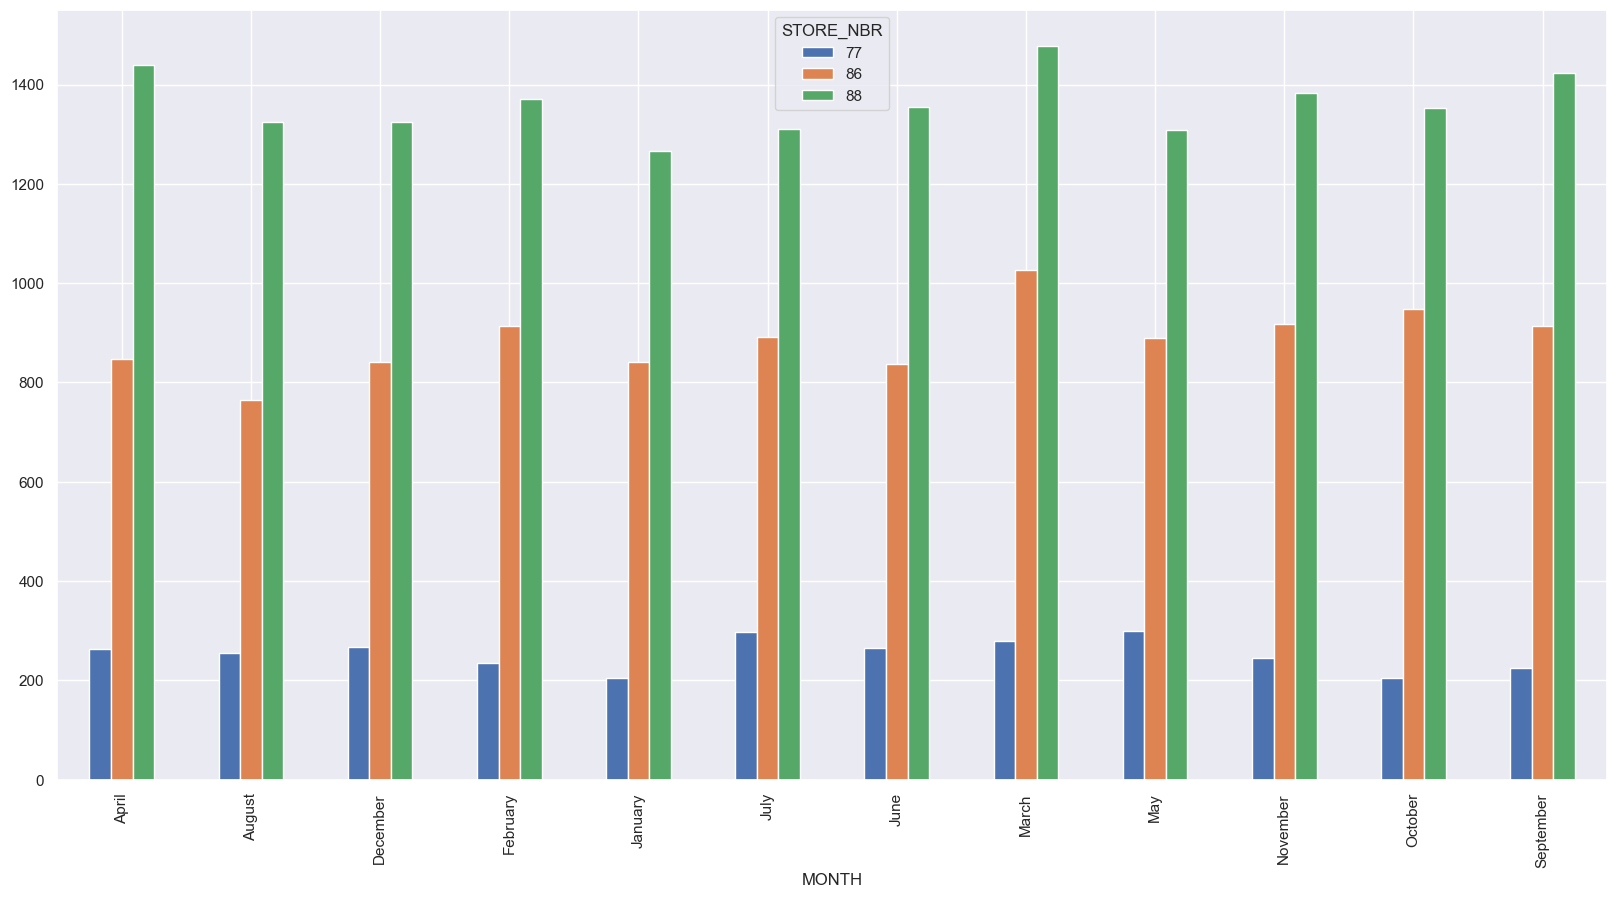

In [115]:
stores_77_86_88.pivot_table(index=['MONTH'], values='TOT_SALES', 
                            columns= 'STORE_NBR',
                            aggfunc= np.sum).plot(kind= "bar",figsize=(20,10))

### Total sales for 77, 86, and 88 stores per LIFESTAGE ----

In [116]:
stores_77_86_88.pivot_table(index=['LIFESTAGE'], values= 'TOT_SALES',
                           aggfunc=np.sum).sort_values(by='TOT_SALES',
                                        ascending=False)

,TOT_SALES
LIFESTAGE,
OLDER SINGLES/COUPLES,6895.45
OLDER FAMILIES,6115.90
RETIREES,5486.80
YOUNG FAMILIES,4717.05
YOUNG SINGLES/COUPLES,3193.80
MIDAGE SINGLES/COUPLES,2876.30
NEW FAMILIES,723.30


<AxesSubplot:title={'center':'Total sales for 77, 86, and 88 stores per LIFESTAGE '}, xlabel='Types of LIFESTAGE', ylabel='Total Sales'>

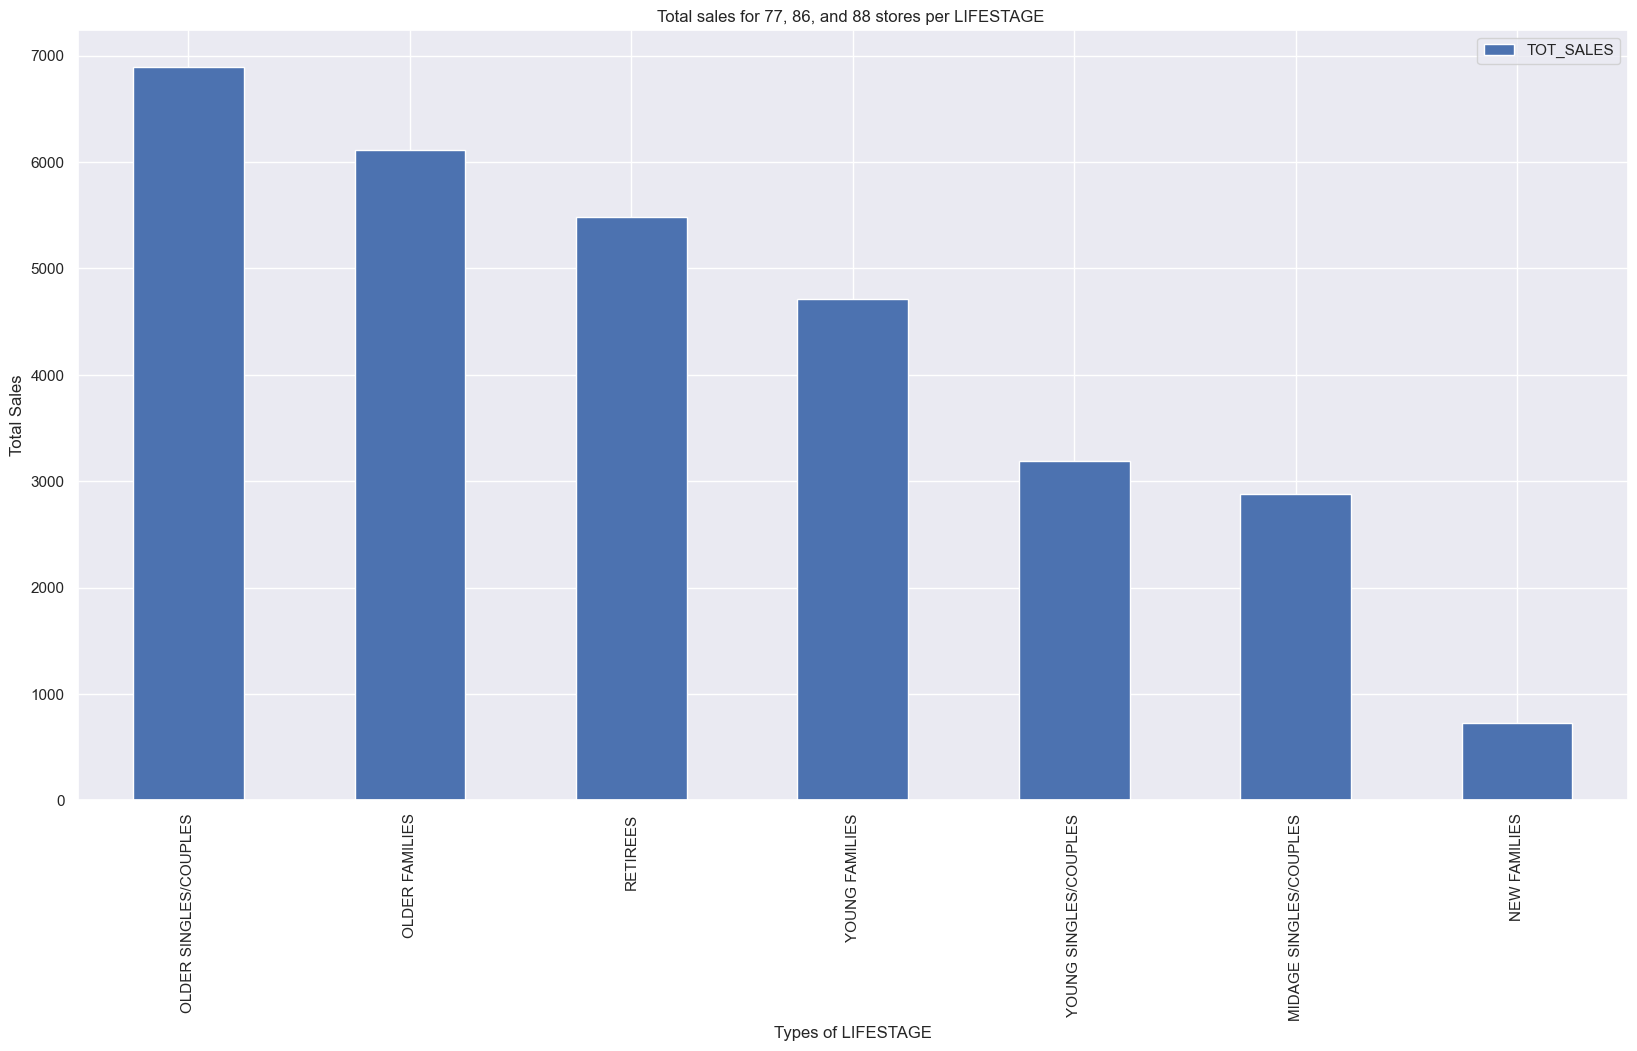

In [117]:
stores_77_86_88.pivot_table(index=['LIFESTAGE'], values= 'TOT_SALES',
                           aggfunc=np.sum).sort_values(by='TOT_SALES',
                                        ascending=False).plot(kind= "bar",figsize=(20,10),
                                                          title='Total sales for 77, 86, and 88 stores per LIFESTAGE ',
                                                            ylabel='Total Sales', xlabel='Types of LIFESTAGE')

In [118]:
stores_77_86_88.pivot_table(index=['STORE_NBR'], values='TOT_SALES', 
                            columns= 'LIFESTAGE',
                            aggfunc= np.sum, 
                            margins=True, 
                            margins_name='Total').sort_values(by='Total', ascending=False)

LIFESTAGE,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES,Total
STORE_NBR,,,,,,,,
Total,2876.3,723.3,6115.9,6895.45,5486.8,4717.05,3193.8,30008.60
88,1800.2,223.0,3232.8,4187.65,2993.9,2538.30,1357.4,16333.25
86,871.1,354.3,2534.9,2146.70,1778.1,1913.35,1036.9,10635.35
77,205.0,146.0,348.2,561.10,714.8,265.40,799.5,3040.00


<AxesSubplot:xlabel='STORE_NBR'>

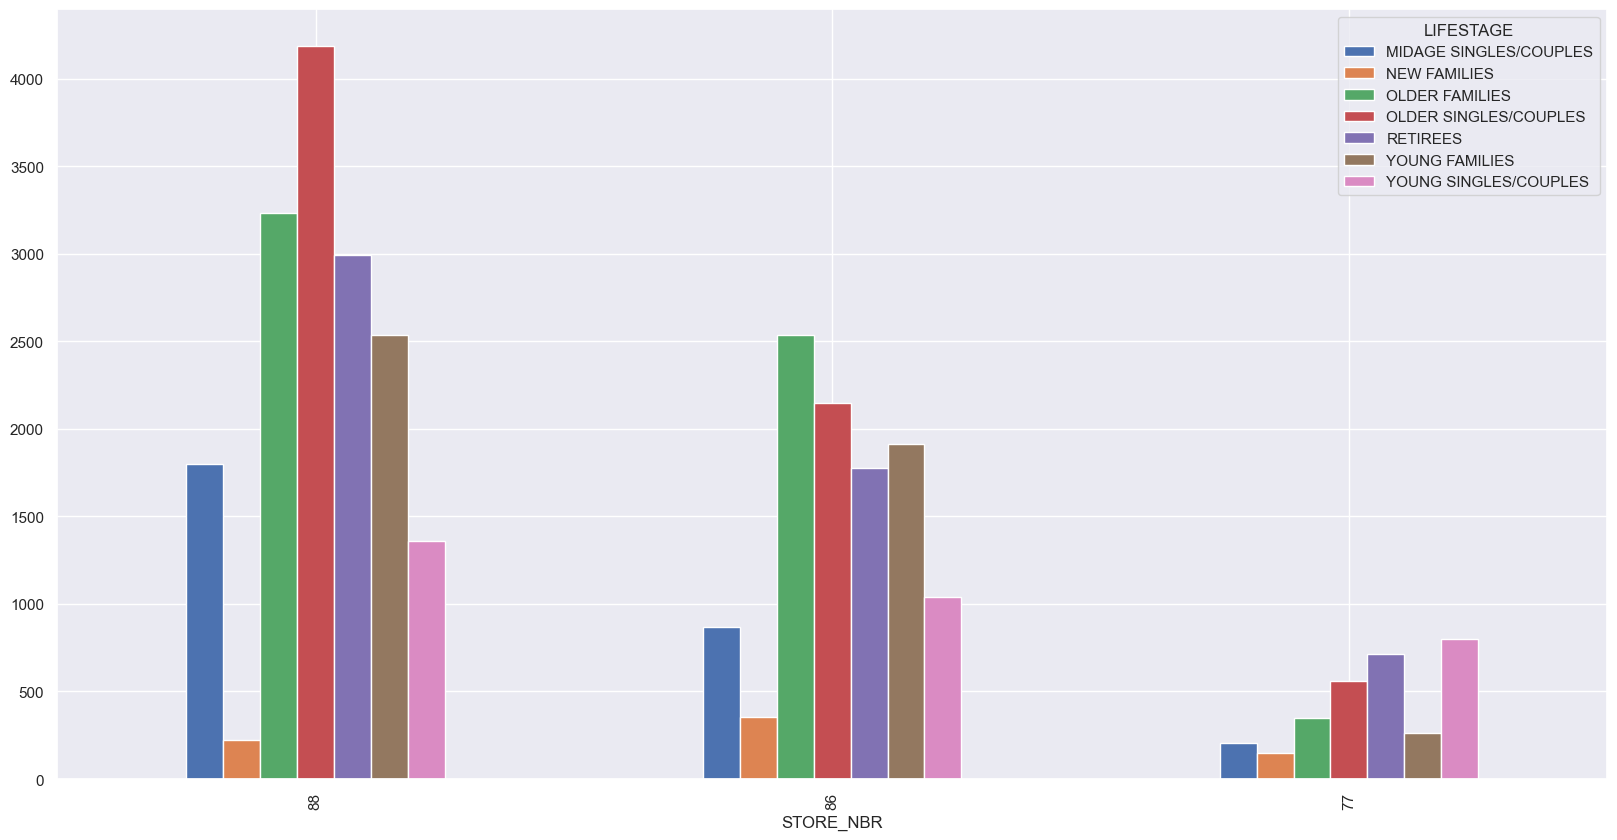

In [119]:
stores_77_86_88.pivot_table(index=['STORE_NBR'], values='TOT_SALES', 
                            columns= 'LIFESTAGE',
                            aggfunc= np.sum).sort_values(by='STORE_NBR', ascending=False).plot(kind= "bar",figsize=(20,10))

<AxesSubplot:xlabel='MONTH'>

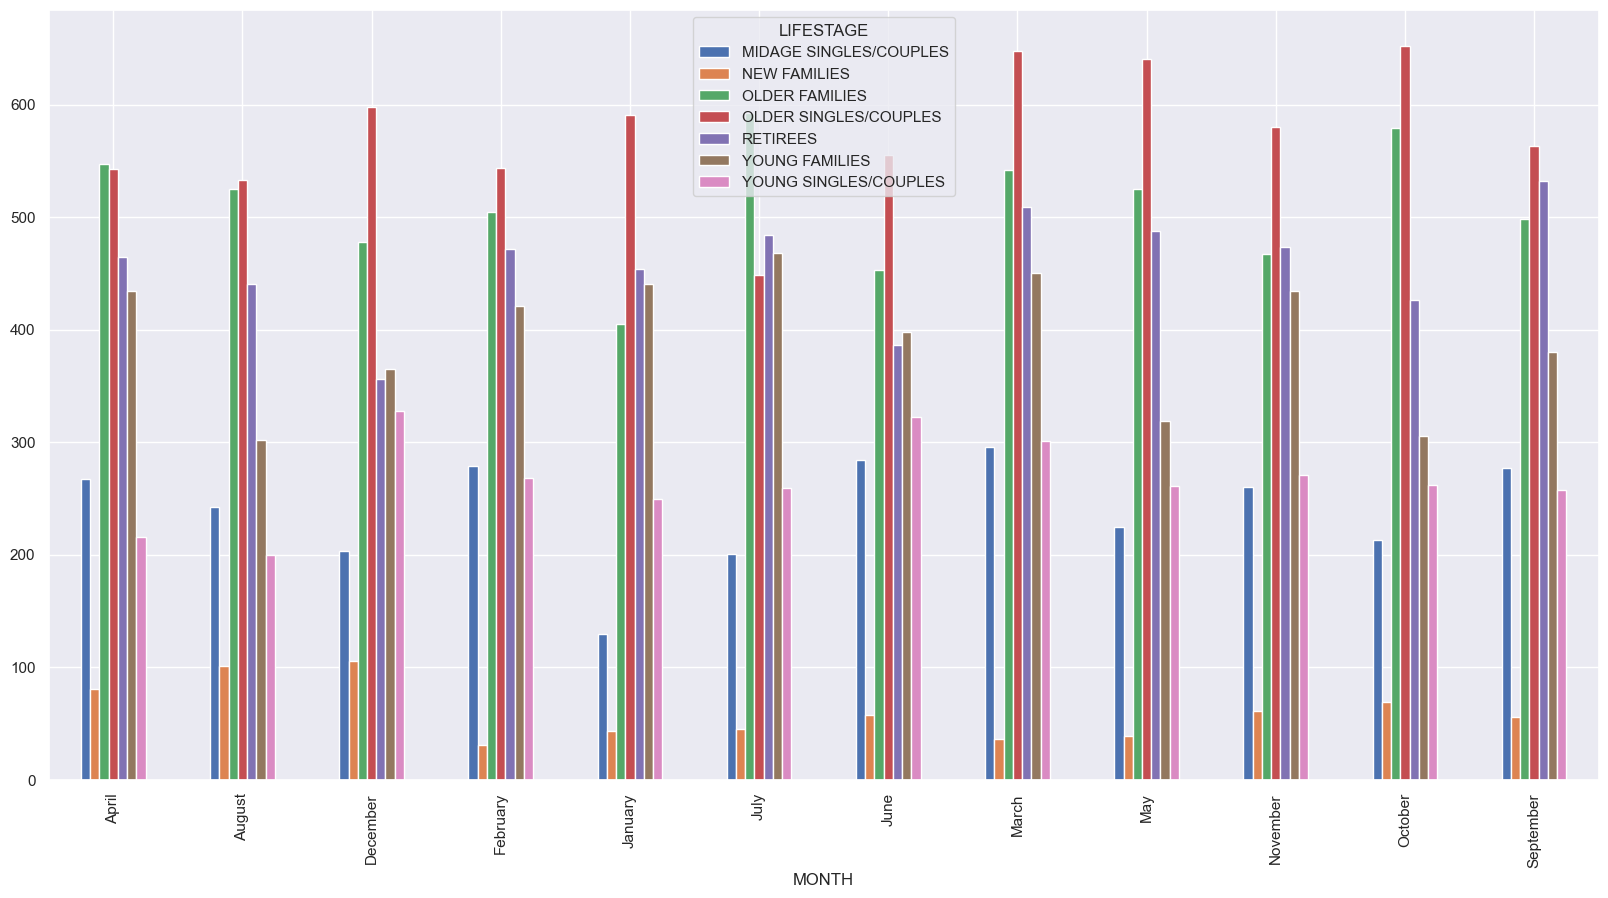

In [120]:
stores_77_86_88.pivot_table(index=['MONTH'], values='TOT_SALES', 
                            columns= 'LIFESTAGE',
                            aggfunc= np.sum).plot(kind= "bar",figsize=(20,10))

<AxesSubplot:xlabel='LIFESTAGE'>

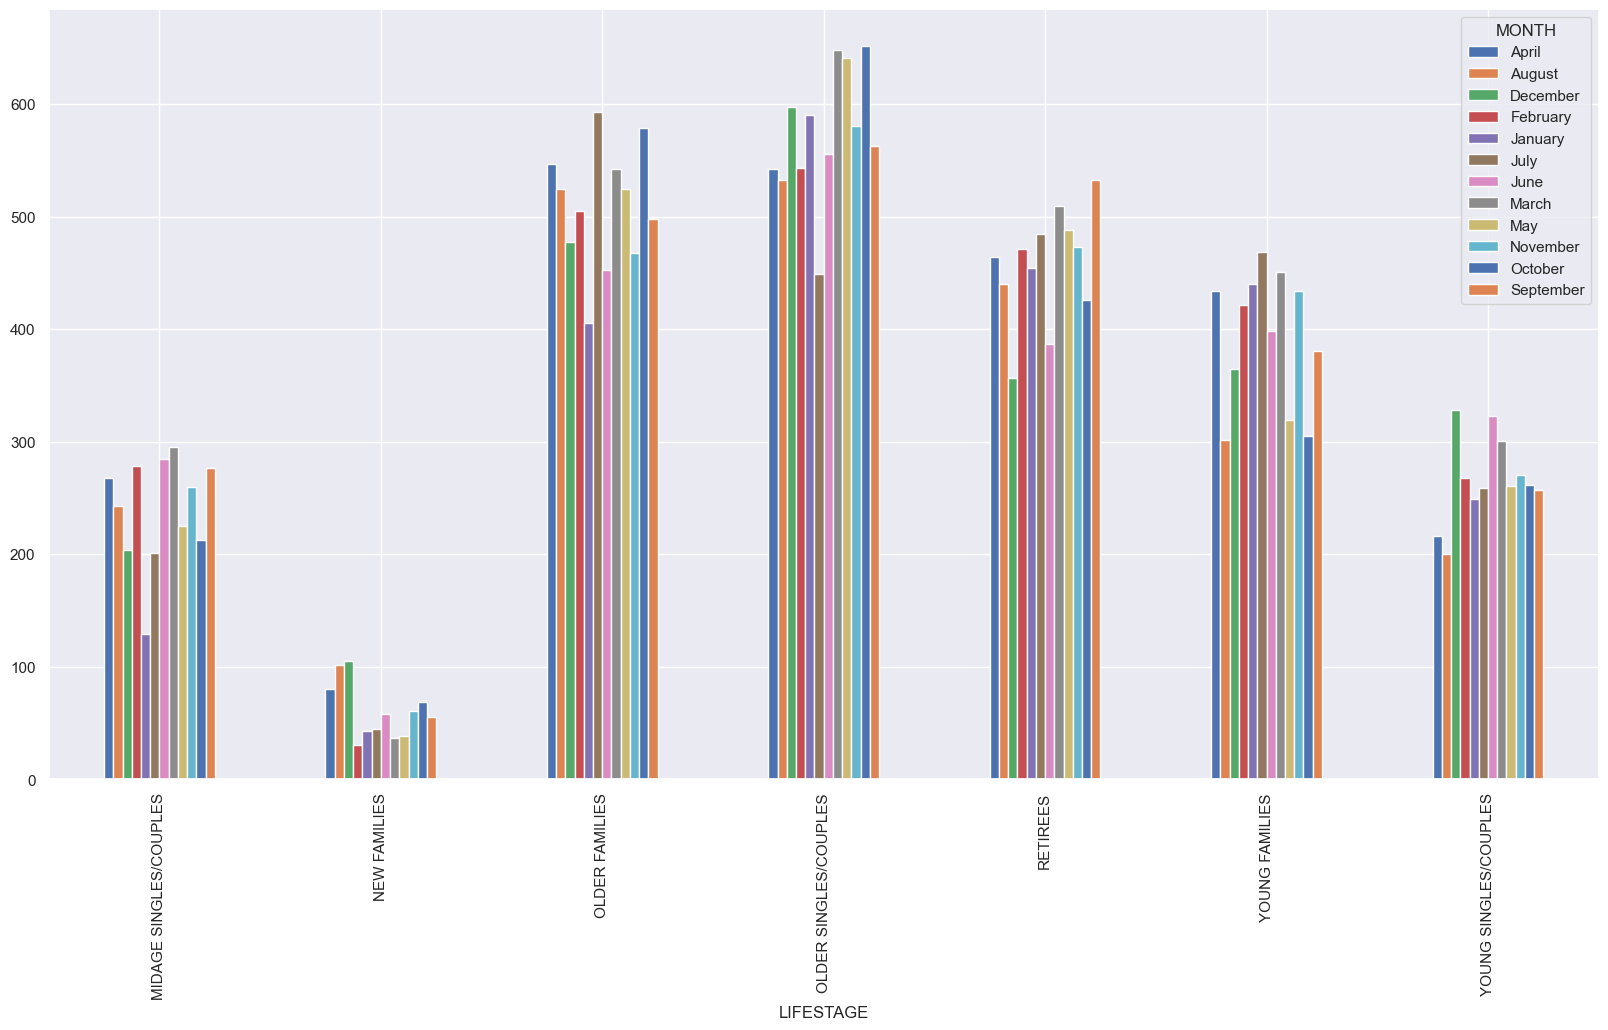

In [121]:
stores_77_86_88.pivot_table(index=["LIFESTAGE"], values='TOT_SALES', 
                            columns= 'MONTH',
                            aggfunc= np.sum).plot(kind= "bar",figsize=(20,10))